In [176]:
#imports
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [177]:
#reading and writing the file to the screen
powerProductionDataSet = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
powerProductionDataSet

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [178]:
# first 20
powerProductionDataSet.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [179]:
# more info
powerProductionDataSet.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [180]:
# fit the data
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [181]:
model.fit(powerProductionDataSet['speed'], powerProductionDataSet['power'], epochs=30000, batch_size=10)

Epoch 1/30000
50/50 [==============================] - 0s 1ms/step - loss: 3874.4900
Epoch 2/30000
50/50 [==============================] - 0s 1ms/step - loss: 3699.9292
Epoch 3/30000
50/50 [==============================] - 0s 2ms/step - loss: 3491.7253
Epoch 4/30000
50/50 [==============================] - 0s 2ms/step - loss: 3231.3962
Epoch 5/30000
50/50 [==============================] - 0s 2ms/step - loss: 3009.1531
Epoch 6/30000
50/50 [==============================] - 0s 2ms/step - loss: 2844.4907
Epoch 7/30000
50/50 [==============================] - 0s 2ms/step - loss: 2686.3542
Epoch 8/30000
50/50 [==============================] - 0s 2ms/step - loss: 2538.3586
Epoch 9/30000
50/50 [==============================] - 0s 2ms/step - loss: 2414.6343
Epoch 10/30000
50/50 [==============================] - 0s 2ms/step - loss: 2307.8916
Epoch 11/30000
50/50 [==============================] - 0s 2ms/step - loss: 2211.2620
Epoch 12/30000
50/50 [==============================] - 0s 2ms/

50/50 [==============================] - 0s 2ms/step - loss: 337.2293
Epoch 98/30000
50/50 [==============================] - 0s 2ms/step - loss: 335.7799
Epoch 99/30000
50/50 [==============================] - 0s 2ms/step - loss: 334.8432
Epoch 100/30000
50/50 [==============================] - 0s 2ms/step - loss: 334.4809
Epoch 101/30000
50/50 [==============================] - 0s 2ms/step - loss: 333.3688
Epoch 102/30000
50/50 [==============================] - 0s 2ms/step - loss: 332.4697
Epoch 103/30000
50/50 [==============================] - 0s 2ms/step - loss: 331.7641
Epoch 104/30000
50/50 [==============================] - 0s 2ms/step - loss: 330.4952
Epoch 105/30000
50/50 [==============================] - 0s 2ms/step - loss: 331.0816
Epoch 106/30000
50/50 [==============================] - 0s 2ms/step - loss: 329.3478
Epoch 107/30000
50/50 [==============================] - 0s 2ms/step - loss: 328.7594
Epoch 108/30000
50/50 [==============================] - 0s 2ms/step - l

50/50 [==============================] - 0s 3ms/step - loss: 287.2181
Epoch 193/30000
50/50 [==============================] - 0s 3ms/step - loss: 286.3436
Epoch 194/30000
50/50 [==============================] - 0s 3ms/step - loss: 285.8982
Epoch 195/30000
50/50 [==============================] - 0s 3ms/step - loss: 286.0567
Epoch 196/30000
50/50 [==============================] - 0s 3ms/step - loss: 285.1358
Epoch 197/30000
50/50 [==============================] - 0s 3ms/step - loss: 284.7605
Epoch 198/30000
50/50 [==============================] - 0s 3ms/step - loss: 284.1723
Epoch 199/30000
50/50 [==============================] - 0s 3ms/step - loss: 284.1120
Epoch 200/30000
50/50 [==============================] - 0s 3ms/step - loss: 283.7994
Epoch 201/30000
50/50 [==============================] - 0s 3ms/step - loss: 283.0118
Epoch 202/30000
50/50 [==============================] - 0s 3ms/step - loss: 282.7158
Epoch 203/30000
50/50 [==============================] - 0s 3ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 262.5015
Epoch 288/30000
50/50 [==============================] - 0s 2ms/step - loss: 262.5958
Epoch 289/30000
50/50 [==============================] - 0s 2ms/step - loss: 262.0142
Epoch 290/30000
50/50 [==============================] - 0s 3ms/step - loss: 262.0558
Epoch 291/30000
50/50 [==============================] - 0s 3ms/step - loss: 262.1632
Epoch 292/30000
50/50 [==============================] - 0s 3ms/step - loss: 261.6248
Epoch 293/30000
50/50 [==============================] - 0s 4ms/step - loss: 261.6572
Epoch 294/30000
50/50 [==============================] - 0s 4ms/step - loss: 261.8358
Epoch 295/30000
50/50 [==============================] - 0s 2ms/step - loss: 261.2969
Epoch 296/30000
50/50 [==============================] - 0s 2ms/step - loss: 261.3452
Epoch 297/30000
50/50 [==============================] - 0s 2ms/step - loss: 261.2587
Epoch 298/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 255.2181
Epoch 383/30000
50/50 [==============================] - 0s 2ms/step - loss: 255.0616
Epoch 384/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.9759
Epoch 385/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.9477
Epoch 386/30000
50/50 [==============================] - 0s 2ms/step - loss: 255.1023
Epoch 387/30000
50/50 [==============================] - 0s 2ms/step - loss: 255.2392
Epoch 388/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.9144
Epoch 389/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.8403
Epoch 390/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.6893
Epoch 391/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.7930
Epoch 392/30000
50/50 [==============================] - 0s 2ms/step - loss: 254.7293
Epoch 393/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 252.2247
Epoch 478/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.2312
Epoch 479/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.3145
Epoch 480/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.2121
Epoch 481/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.7588
Epoch 482/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.2946
Epoch 483/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.3779
Epoch 484/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.0899
Epoch 485/30000
50/50 [==============================] - 0s 2ms/step - loss: 252.3862
Epoch 486/30000
50/50 [==============================] - 0s 2ms/step - loss: 251.9125
Epoch 487/30000
50/50 [==============================] - 0s 2ms/step - loss: 251.9409
Epoch 488/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 250.4262
Epoch 573/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.3862
Epoch 574/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.6407
Epoch 575/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.5321
Epoch 576/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.3036
Epoch 577/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.4691
Epoch 578/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.8057
Epoch 579/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.2889
Epoch 580/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.4406
Epoch 581/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.7659
Epoch 582/30000
50/50 [==============================] - 0s 2ms/step - loss: 250.2390
Epoch 583/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 249.0496
Epoch 668/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.9619
Epoch 669/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.0797
Epoch 670/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.0585
Epoch 671/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.1314
Epoch 672/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.9441
Epoch 673/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.0712
Epoch 674/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.9157
Epoch 675/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.2241
Epoch 676/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.0694
Epoch 677/30000
50/50 [==============================] - 0s 2ms/step - loss: 249.1631
Epoch 678/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 247.8215
Epoch 763/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.8720
Epoch 764/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.0561
Epoch 765/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.0037
Epoch 766/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.9145
Epoch 767/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.7465
Epoch 768/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.7401
Epoch 769/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.6984
Epoch 770/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.0604
Epoch 771/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.7706
Epoch 772/30000
50/50 [==============================] - 0s 2ms/step - loss: 248.0908
Epoch 773/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 246.7819
Epoch 858/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.6164
Epoch 859/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.6841
Epoch 860/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.7395
Epoch 861/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.8694
Epoch 862/30000
50/50 [==============================] - 0s 2ms/step - loss: 247.0213
Epoch 863/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.6730
Epoch 864/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.6684
Epoch 865/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.6114
Epoch 866/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.7029
Epoch 867/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.6116
Epoch 868/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 1ms/step - loss: 245.7908
Epoch 953/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.7002
Epoch 954/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.5197
Epoch 955/30000
50/50 [==============================] - 0s 1ms/step - loss: 245.8017
Epoch 956/30000
50/50 [==============================] - 0s 1ms/step - loss: 245.8260
Epoch 957/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.4304
Epoch 958/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.6537
Epoch 959/30000
50/50 [==============================] - 0s 2ms/step - loss: 246.0248
Epoch 960/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.7100
Epoch 961/30000
50/50 [==============================] - 0s 1ms/step - loss: 245.6322
Epoch 962/30000
50/50 [==============================] - 0s 2ms/step - loss: 245.4123
Epoch 963/30000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 244.8590
Epoch 1047/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.5652
Epoch 1048/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.9388
Epoch 1049/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.6555
Epoch 1050/30000
50/50 [==============================] - 0s 1ms/step - loss: 244.9364
Epoch 1051/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.5588
Epoch 1052/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.7636
Epoch 1053/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.5101
Epoch 1054/30000
50/50 [==============================] - 0s 2ms/step - loss: 244.5868
Epoch 1055/30000
50/50 [==============================] - 0s 1ms/step - loss: 245.0071
Epoch 1056/30000
50/50 [==============================] - 0s 1ms/step - loss: 244.7086
Epoch 1057/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 243.7950
Epoch 1141/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.6430
Epoch 1142/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.6168
Epoch 1143/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.6489
Epoch 1144/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.6360
Epoch 1145/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.5955
Epoch 1146/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.4772
Epoch 1147/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.5258
Epoch 1148/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.9045
Epoch 1149/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.8488
Epoch 1150/30000
50/50 [==============================] - 0s 2ms/step - loss: 243.4782
Epoch 1151/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 242.6134
Epoch 1235/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.8346
Epoch 1236/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.5804
Epoch 1237/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.4902
Epoch 1238/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.6611
Epoch 1239/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.8088
Epoch 1240/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.7913
Epoch 1241/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.4902
Epoch 1242/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.5749
Epoch 1243/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.3997
Epoch 1244/30000
50/50 [==============================] - 0s 2ms/step - loss: 242.6161
Epoch 1245/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 241.8231
Epoch 1329/30000
50/50 [==============================] - 0s 2ms/step - loss: 241.7687
Epoch 1330/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.7263
Epoch 1331/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.6826
Epoch 1332/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.4751
Epoch 1333/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.7734
Epoch 1334/30000
50/50 [==============================] - 0s 1ms/step - loss: 242.4129
Epoch 1335/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.4860
Epoch 1336/30000
50/50 [==============================] - 0s 2ms/step - loss: 241.7017
Epoch 1337/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.6957
Epoch 1338/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.7062
Epoch 1339/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 240.6138
Epoch 1423/30000
50/50 [==============================] - 0s 2ms/step - loss: 240.5195
Epoch 1424/30000
50/50 [==============================] - 0s 2ms/step - loss: 240.7179
Epoch 1425/30000
50/50 [==============================] - 0s 1ms/step - loss: 240.6061
Epoch 1426/30000
50/50 [==============================] - 0s 1ms/step - loss: 240.6799
Epoch 1427/30000
50/50 [==============================] - 0s 2ms/step - loss: 241.0068
Epoch 1428/30000
50/50 [==============================] - 0s 2ms/step - loss: 240.7279
Epoch 1429/30000
50/50 [==============================] - 0s 1ms/step - loss: 240.9458
Epoch 1430/30000
50/50 [==============================] - 0s 2ms/step - loss: 240.5761
Epoch 1431/30000
50/50 [==============================] - 0s 1ms/step - loss: 241.0377
Epoch 1432/30000
50/50 [==============================] - 0s 2ms/step - loss: 240.5512
Epoch 1433/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 240.0157
Epoch 1517/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.8908
Epoch 1518/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.8214
Epoch 1519/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.7604
Epoch 1520/30000
50/50 [==============================] - 0s 2ms/step - loss: 239.9416
Epoch 1521/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.6565
Epoch 1522/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.4610
Epoch 1523/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.4787
Epoch 1524/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.6587
Epoch 1525/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.9230
Epoch 1526/30000
50/50 [==============================] - 0s 2ms/step - loss: 239.8442
Epoch 1527/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 239.1952
Epoch 1611/30000
50/50 [==============================] - 0s 1ms/step - loss: 239.1052
Epoch 1612/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.7894
Epoch 1613/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.6678
Epoch 1614/30000
50/50 [==============================] - 0s 2ms/step - loss: 239.0100
Epoch 1615/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.6792
Epoch 1616/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.8811
Epoch 1617/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.9474
Epoch 1618/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.8584
Epoch 1619/30000
50/50 [==============================] - 0s 2ms/step - loss: 238.6391
Epoch 1620/30000
50/50 [==============================] - 0s 3ms/step - loss: 238.9110
Epoch 1621/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 237.6963
Epoch 1705/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.6427
Epoch 1706/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.4126
Epoch 1707/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.8411
Epoch 1708/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.6998
Epoch 1709/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.5896
Epoch 1710/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.7198
Epoch 1711/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.6511
Epoch 1712/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.5494
Epoch 1713/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.6329
Epoch 1714/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.4137
Epoch 1715/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 236.5398
Epoch 1798/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.0689
Epoch 1799/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.6791
Epoch 1800/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.4650
Epoch 1801/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.9122
Epoch 1802/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.4677
Epoch 1803/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.8455
Epoch 1804/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.8865
Epoch 1805/30000
50/50 [==============================] - 0s 2ms/step - loss: 237.6035
Epoch 1806/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.9615
Epoch 1807/30000
50/50 [==============================] - 0s 2ms/step - loss: 236.6629
Epoch 1808/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 235.8223
Epoch 1892/30000
50/50 [==============================] - 0s 2ms/step - loss: 235.6080
Epoch 1893/30000
50/50 [==============================] - 0s 1ms/step - loss: 235.7018
Epoch 1894/30000
50/50 [==============================] - 0s 2ms/step - loss: 235.6505
Epoch 1895/30000
50/50 [==============================] - 0s 3ms/step - loss: 236.0011
Epoch 1896/30000
50/50 [==============================] - 0s 3ms/step - loss: 235.5211
Epoch 1897/30000
50/50 [==============================] - 0s 3ms/step - loss: 236.4169
Epoch 1898/30000
50/50 [==============================] - 0s 3ms/step - loss: 236.3192
Epoch 1899/30000
50/50 [==============================] - 0s 3ms/step - loss: 235.8273
Epoch 1900/30000
50/50 [==============================] - 0s 3ms/step - loss: 235.7383
Epoch 1901/30000
50/50 [==============================] - 0s 3ms/step - loss: 235.5304
Epoch 1902/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 234.7699
Epoch 1986/30000
50/50 [==============================] - 0s 2ms/step - loss: 234.6668
Epoch 1987/30000
50/50 [==============================] - 0s 1ms/step - loss: 234.7419
Epoch 1988/30000
50/50 [==============================] - 0s 2ms/step - loss: 234.8315
Epoch 1989/30000
50/50 [==============================] - 0s 2ms/step - loss: 234.9256
Epoch 1990/30000
50/50 [==============================] - 0s 2ms/step - loss: 234.5857
Epoch 1991/30000
50/50 [==============================] - 0s 1ms/step - loss: 234.7055
Epoch 1992/30000
50/50 [==============================] - 0s 1ms/step - loss: 235.0343
Epoch 1993/30000
50/50 [==============================] - 0s 1ms/step - loss: 235.6422
Epoch 1994/30000
50/50 [==============================] - 0s 2ms/step - loss: 234.5766
Epoch 1995/30000
50/50 [==============================] - 0s 2ms/step - loss: 235.0644
Epoch 1996/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 3ms/step - loss: 234.2055
Epoch 2080/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.9489
Epoch 2081/30000
50/50 [==============================] - 0s 3ms/step - loss: 234.4393
Epoch 2082/30000
50/50 [==============================] - 0s 3ms/step - loss: 234.0199
Epoch 2083/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.9025
Epoch 2084/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.9118
Epoch 2085/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.6460
Epoch 2086/30000
50/50 [==============================] - 0s 3ms/step - loss: 234.0683
Epoch 2087/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.4433
Epoch 2088/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.7346
Epoch 2089/30000
50/50 [==============================] - 0s 3ms/step - loss: 233.5894
Epoch 2090/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 233.2471
Epoch 2174/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.0222
Epoch 2175/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.4807
Epoch 2176/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.4349
Epoch 2177/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.1902
Epoch 2178/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.1371
Epoch 2179/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.2585
Epoch 2180/30000
50/50 [==============================] - 0s 2ms/step - loss: 232.9648
Epoch 2181/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.0327
Epoch 2182/30000
50/50 [==============================] - 0s 2ms/step - loss: 232.9197
Epoch 2183/30000
50/50 [==============================] - 0s 2ms/step - loss: 233.0112
Epoch 2184/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 232.0479
Epoch 2268/30000
50/50 [==============================] - 0s 1ms/step - loss: 232.2821
Epoch 2269/30000
50/50 [==============================] - 0s 1ms/step - loss: 231.8222
Epoch 2270/30000
50/50 [==============================] - 0s 2ms/step - loss: 231.8707
Epoch 2271/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.2509
Epoch 2272/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.9579
Epoch 2273/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.0876
Epoch 2274/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.3412
Epoch 2275/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.2807
Epoch 2276/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.1497
Epoch 2277/30000
50/50 [==============================] - 0s 3ms/step - loss: 232.0935
Epoch 2278/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 231.5137
Epoch 2362/30000
50/50 [==============================] - 0s 2ms/step - loss: 231.2701
Epoch 2363/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.0597
Epoch 2364/30000
50/50 [==============================] - 0s 3ms/step - loss: 230.9165
Epoch 2365/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.0313
Epoch 2366/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.1516
Epoch 2367/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.0843
Epoch 2368/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.1558
Epoch 2369/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.4319
Epoch 2370/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.3102
Epoch 2371/30000
50/50 [==============================] - 0s 3ms/step - loss: 231.1093
Epoch 2372/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 230.5463
Epoch 2456/30000
50/50 [==============================] - 0s 2ms/step - loss: 230.4918
Epoch 2457/30000
50/50 [==============================] - 0s 2ms/step - loss: 230.6495
Epoch 2458/30000
50/50 [==============================] - 0s 2ms/step - loss: 230.4128
Epoch 2459/30000
50/50 [==============================] - 0s 3ms/step - loss: 230.2548
Epoch 2460/30000
50/50 [==============================] - 0s 3ms/step - loss: 230.2139
Epoch 2461/30000
50/50 [==============================] - 0s 3ms/step - loss: 230.5628
Epoch 2462/30000
50/50 [==============================] - 0s 3ms/step - loss: 230.0759
Epoch 2463/30000
50/50 [==============================] - 0s 4ms/step - loss: 230.4165
Epoch 2464/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.8501
Epoch 2465/30000
50/50 [==============================] - 0s 1ms/step - loss: 230.0143
Epoch 2466/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 230.2614
Epoch 2550/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.9111
Epoch 2551/30000
50/50 [==============================] - 0s 1ms/step - loss: 229.9005
Epoch 2552/30000
50/50 [==============================] - 0s 1ms/step - loss: 229.5076
Epoch 2553/30000
50/50 [==============================] - 0s 1ms/step - loss: 229.7980
Epoch 2554/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.3723
Epoch 2555/30000
50/50 [==============================] - 0s 2ms/step - loss: 230.6252
Epoch 2556/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.9337
Epoch 2557/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.7323
Epoch 2558/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.5515
Epoch 2559/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.2296
Epoch 2560/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 228.8972
Epoch 2644/30000
50/50 [==============================] - 0s 2ms/step - loss: 229.2696
Epoch 2645/30000
50/50 [==============================] - 0s 1ms/step - loss: 228.4402
Epoch 2646/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.7059
Epoch 2647/30000
50/50 [==============================] - 0s 1ms/step - loss: 228.5004
Epoch 2648/30000
50/50 [==============================] - 0s 1ms/step - loss: 229.0248
Epoch 2649/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.8925
Epoch 2650/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.8010
Epoch 2651/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.2926
Epoch 2652/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.5822
Epoch 2653/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.5552
Epoch 2654/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 227.6539
Epoch 2738/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.9120
Epoch 2739/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.5867
Epoch 2740/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.0090
Epoch 2741/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.8717
Epoch 2742/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.7982
Epoch 2743/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.4569
Epoch 2744/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.1311
Epoch 2745/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.9081
Epoch 2746/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.7216
Epoch 2747/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.8788
Epoch 2748/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 227.1893
Epoch 2832/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.0136
Epoch 2833/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.3177
Epoch 2834/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.2714
Epoch 2835/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.4620
Epoch 2836/30000
50/50 [==============================] - 0s 2ms/step - loss: 226.9200
Epoch 2837/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.7486
Epoch 2838/30000
50/50 [==============================] - 0s 2ms/step - loss: 227.3297
Epoch 2839/30000
50/50 [==============================] - 0s 2ms/step - loss: 226.7869
Epoch 2840/30000
50/50 [==============================] - 0s 3ms/step - loss: 227.0633
Epoch 2841/30000
50/50 [==============================] - 0s 2ms/step - loss: 228.4276
Epoch 2842/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 226.0325
Epoch 2926/30000
50/50 [==============================] - 0s 1ms/step - loss: 227.1420
Epoch 2927/30000
50/50 [==============================] - 0s 2ms/step - loss: 226.3454
Epoch 2928/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.1667
Epoch 2929/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.0144
Epoch 2930/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.0049
Epoch 2931/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.8298
Epoch 2932/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.3184
Epoch 2933/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.2988
Epoch 2934/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.3601
Epoch 2935/30000
50/50 [==============================] - 0s 3ms/step - loss: 226.2583
Epoch 2936/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 225.8809
Epoch 3020/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.2269
Epoch 3021/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.7846
Epoch 3022/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.5410
Epoch 3023/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.3805
Epoch 3024/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.3239
Epoch 3025/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.2475
Epoch 3026/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.3086
Epoch 3027/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.2588
Epoch 3028/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.3217
Epoch 3029/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.3629
Epoch 3030/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 224.8309
Epoch 3114/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.6187
Epoch 3115/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.8990
Epoch 3116/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.6204
Epoch 3117/30000
50/50 [==============================] - 0s 2ms/step - loss: 225.2946
Epoch 3118/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.8566
Epoch 3119/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.6181
Epoch 3120/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.9365
Epoch 3121/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.8560
Epoch 3122/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.8738
Epoch 3123/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.6891
Epoch 3124/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 223.9693
Epoch 3208/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.8330
Epoch 3209/30000
50/50 [==============================] - 0s 984us/step - loss: 223.9630
Epoch 3210/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.6303
Epoch 3211/30000
50/50 [==============================] - 0s 1ms/step - loss: 224.1246
Epoch 3212/30000
50/50 [==============================] - 0s 898us/step - loss: 225.0708
Epoch 3213/30000
50/50 [==============================] - 0s 900us/step - loss: 224.0688
Epoch 3214/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.2834
Epoch 3215/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.2940
Epoch 3216/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.9933
Epoch 3217/30000
50/50 [==============================] - 0s 1ms/step - loss: 223.8307
Epoch 3218/30000
50/50 [==============================

50/50 [==============================] - 0s 2ms/step - loss: 223.8846
Epoch 3302/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.3316
Epoch 3303/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.2675
Epoch 3304/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.2154
Epoch 3305/30000
50/50 [==============================] - 0s 2ms/step - loss: 224.2002
Epoch 3306/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.4167
Epoch 3307/30000
50/50 [==============================] - 0s 1ms/step - loss: 223.5718
Epoch 3308/30000
50/50 [==============================] - 0s 976us/step - loss: 223.1980
Epoch 3309/30000
50/50 [==============================] - 0s 992us/step - loss: 223.1649
Epoch 3310/30000
50/50 [==============================] - 0s 1ms/step - loss: 223.2390
Epoch 3311/30000
50/50 [==============================] - 0s 1ms/step - loss: 223.6092
Epoch 3312/30000
50/50 [==============================] 

50/50 [==============================] - 0s 3ms/step - loss: 222.5423
Epoch 3396/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.6092
Epoch 3397/30000
50/50 [==============================] - 0s 3ms/step - loss: 222.3901
Epoch 3398/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.9478
Epoch 3399/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.2508
Epoch 3400/30000
50/50 [==============================] - 0s 3ms/step - loss: 222.2981
Epoch 3401/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.5752
Epoch 3402/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.0197
Epoch 3403/30000
50/50 [==============================] - 0s 2ms/step - loss: 223.7313
Epoch 3404/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.8447
Epoch 3405/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.5721
Epoch 3406/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 221.8643
Epoch 3490/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.0432
Epoch 3491/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.2129
Epoch 3492/30000
50/50 [==============================] - 0s 1ms/step - loss: 221.7592
Epoch 3493/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.7678
Epoch 3494/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.7332
Epoch 3495/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.8582
Epoch 3496/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.8628
Epoch 3497/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.5916
Epoch 3498/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.0912
Epoch 3499/30000
50/50 [==============================] - 0s 2ms/step - loss: 222.0165
Epoch 3500/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 221.1934
Epoch 3584/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.1897
Epoch 3585/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.1344
Epoch 3586/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.2840
Epoch 3587/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.3078
Epoch 3588/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.9138
Epoch 3589/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.4170
Epoch 3590/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.0984
Epoch 3591/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.2159
Epoch 3592/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.9261
Epoch 3593/30000
50/50 [==============================] - 0s 2ms/step - loss: 221.3670
Epoch 3594/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 221.7917
Epoch 3678/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.5826
Epoch 3679/30000
50/50 [==============================] - 0s 1ms/step - loss: 221.0392
Epoch 3680/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.1378
Epoch 3681/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.3527
Epoch 3682/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.8651
Epoch 3683/30000
50/50 [==============================] - 0s 3ms/step - loss: 220.7661
Epoch 3684/30000
50/50 [==============================] - 0s 3ms/step - loss: 220.5820
Epoch 3685/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.5635
Epoch 3686/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.5855
Epoch 3687/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.2024
Epoch 3688/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 220.4176
Epoch 3772/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.4396
Epoch 3773/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.1742
Epoch 3774/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.3531
Epoch 3775/30000
50/50 [==============================] - 0s 1ms/step - loss: 219.6915
Epoch 3776/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.0060
Epoch 3777/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.8246
Epoch 3778/30000
50/50 [==============================] - 0s 1ms/step - loss: 220.2427
Epoch 3779/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.5141
Epoch 3780/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.0842
Epoch 3781/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.9473
Epoch 3782/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 218.7651
Epoch 3866/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.2199
Epoch 3867/30000
50/50 [==============================] - 0s 2ms/step - loss: 220.4077
Epoch 3868/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.7431
Epoch 3869/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.9944
Epoch 3870/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.5867
Epoch 3871/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.7411
Epoch 3872/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.0767
Epoch 3873/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.8035
Epoch 3874/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.8891
Epoch 3875/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.3882
Epoch 3876/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 218.0218
Epoch 3960/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.5343
Epoch 3961/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.2113
Epoch 3962/30000
50/50 [==============================] - 0s 1ms/step - loss: 218.5524
Epoch 3963/30000
50/50 [==============================] - 0s 1ms/step - loss: 218.3574
Epoch 3964/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.9087
Epoch 3965/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.6785
Epoch 3966/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.3354
Epoch 3967/30000
50/50 [==============================] - 0s 1ms/step - loss: 218.4790
Epoch 3968/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.9600
Epoch 3969/30000
50/50 [==============================] - 0s 2ms/step - loss: 219.2476
Epoch 3970/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 218.6460
Epoch 4054/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.2418
Epoch 4055/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.5440
Epoch 4056/30000
50/50 [==============================] - 0s 1ms/step - loss: 217.9752
Epoch 4057/30000
50/50 [==============================] - 0s 1ms/step - loss: 218.4072
Epoch 4058/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.8820
Epoch 4059/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.5743
Epoch 4060/30000
50/50 [==============================] - 0s 2ms/step - loss: 218.0966
Epoch 4061/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.6639
Epoch 4062/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.6127
Epoch 4063/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.8714
Epoch 4064/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 217.2979
Epoch 4147/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.1935
Epoch 4148/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.3272
Epoch 4149/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.8631
Epoch 4150/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.4880
Epoch 4151/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.6736
Epoch 4152/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.2657
Epoch 4153/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.5610
Epoch 4154/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.2744
Epoch 4155/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.2728
Epoch 4156/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.8760
Epoch 4157/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 217.3385
Epoch 4241/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.8077
Epoch 4242/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.4400
Epoch 4243/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.5941
Epoch 4244/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.5448
Epoch 4245/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.2811
Epoch 4246/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.9236
Epoch 4247/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.6776
Epoch 4248/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.8316
Epoch 4249/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.4029
Epoch 4250/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.5490
Epoch 4251/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 216.1066
Epoch 4335/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.1287
Epoch 4336/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.9699
Epoch 4337/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.3556
Epoch 4338/30000
50/50 [==============================] - 0s 2ms/step - loss: 217.2227
Epoch 4339/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.9027
Epoch 4340/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.7006
Epoch 4341/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.2159
Epoch 4342/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.0762
Epoch 4343/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.7182
Epoch 4344/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.7167
Epoch 4345/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 216.0030
Epoch 4429/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.7035
Epoch 4430/30000
50/50 [==============================] - 0s 2ms/step - loss: 216.6472
Epoch 4431/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.9672
Epoch 4432/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.2789
Epoch 4433/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.3391
Epoch 4434/30000
50/50 [==============================] - 0s 1ms/step - loss: 215.5386
Epoch 4435/30000
50/50 [==============================] - 0s 3ms/step - loss: 215.5346
Epoch 4436/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.9532
Epoch 4437/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.9670
Epoch 4438/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.0803
Epoch 4439/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 215.2112
Epoch 4523/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.6400
Epoch 4524/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.1539
Epoch 4525/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.9027
Epoch 4526/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.9542
Epoch 4527/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.6926
Epoch 4528/30000
50/50 [==============================] - 0s 1ms/step - loss: 214.8966
Epoch 4529/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.0868
Epoch 4530/30000
50/50 [==============================] - 0s 1ms/step - loss: 215.0899
Epoch 4531/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.7589
Epoch 4532/30000
50/50 [==============================] - 0s 1ms/step - loss: 216.4266
Epoch 4533/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 214.4090
Epoch 4617/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.1945
Epoch 4618/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.1646
Epoch 4619/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.4666
Epoch 4620/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.5030
Epoch 4621/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.7839
Epoch 4622/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.9003
Epoch 4623/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.0877
Epoch 4624/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.4917
Epoch 4625/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.3186
Epoch 4626/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.2108
Epoch 4627/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 214.1081
Epoch 4711/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.6282
Epoch 4712/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.3976
Epoch 4713/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.4751
Epoch 4714/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.2709
Epoch 4715/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.6037
Epoch 4716/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.2229
Epoch 4717/30000
50/50 [==============================] - 0s 1ms/step - loss: 213.3386
Epoch 4718/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.4024
Epoch 4719/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.6814
Epoch 4720/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.8744
Epoch 4721/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 213.3868
Epoch 4805/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.1511
Epoch 4806/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.5094
Epoch 4807/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.1539
Epoch 4808/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.2669
Epoch 4809/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.9716
Epoch 4810/30000
50/50 [==============================] - 0s 2ms/step - loss: 215.2851
Epoch 4811/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.2169
Epoch 4812/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.0730
Epoch 4813/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.9447
Epoch 4814/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.9029
Epoch 4815/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 214.5446
Epoch 4899/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.6760
Epoch 4900/30000
50/50 [==============================] - 0s 1ms/step - loss: 213.6234
Epoch 4901/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.1419
Epoch 4902/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.4078
Epoch 4903/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.9740
Epoch 4904/30000
50/50 [==============================] - 0s 2ms/step - loss: 214.2361
Epoch 4905/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.4919
Epoch 4906/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.7122
Epoch 4907/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.8265
Epoch 4908/30000
50/50 [==============================] - 0s 2ms/step - loss: 213.8994
Epoch 4909/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 212.5208
Epoch 4993/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.6353
Epoch 4994/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.2981
Epoch 4995/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.8091
Epoch 4996/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.5527
Epoch 4997/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.6093
Epoch 4998/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.1365
Epoch 4999/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.2824
Epoch 5000/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.9778
Epoch 5001/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.8542
Epoch 5002/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.5763
Epoch 5003/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 212.0699
Epoch 5087/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.8991
Epoch 5088/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.4507
Epoch 5089/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.7566
Epoch 5090/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.8814
Epoch 5091/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.7581
Epoch 5092/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.5267
Epoch 5093/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.7102
Epoch 5094/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.5361
Epoch 5095/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.6923
Epoch 5096/30000
50/50 [==============================] - 0s 1ms/step - loss: 211.7904
Epoch 5097/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 210.9752
Epoch 5181/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.7462
Epoch 5182/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.7736
Epoch 5183/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.9198
Epoch 5184/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.1943
Epoch 5185/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.8643
Epoch 5186/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.1626
Epoch 5187/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.1565
Epoch 5188/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.3216
Epoch 5189/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.0334
Epoch 5190/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.6539
Epoch 5191/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 210.2533
Epoch 5275/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.3743
Epoch 5276/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.8192
Epoch 5277/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.7519
Epoch 5278/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.9697
Epoch 5279/30000
50/50 [==============================] - 0s 2ms/step - loss: 212.5265
Epoch 5280/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.4161
Epoch 5281/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.2742
Epoch 5282/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.8190
Epoch 5283/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.4983
Epoch 5284/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.3513
Epoch 5285/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 210.5274
Epoch 5369/30000
50/50 [==============================] - 0s 2ms/step - loss: 211.0552
Epoch 5370/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.0845
Epoch 5371/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.0718
Epoch 5372/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.1009
Epoch 5373/30000
50/50 [==============================] - 0s 1ms/step - loss: 209.9005
Epoch 5374/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.5351
Epoch 5375/30000
50/50 [==============================] - 0s 1ms/step - loss: 210.0086
Epoch 5376/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.1443
Epoch 5377/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.2483
Epoch 5378/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.6023
Epoch 5379/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 209.3513
Epoch 5463/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.4606
Epoch 5464/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.5066
Epoch 5465/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.6365
Epoch 5466/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.4570
Epoch 5467/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.3914
Epoch 5468/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.4787
Epoch 5469/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.3967
Epoch 5470/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.6625
Epoch 5471/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.5929
Epoch 5472/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.2996
Epoch 5473/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 208.8227
Epoch 5557/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.4827
Epoch 5558/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.3401
Epoch 5559/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.2891
Epoch 5560/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.9514
Epoch 5561/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.9520
Epoch 5562/30000
50/50 [==============================] - 0s 2ms/step - loss: 210.0323
Epoch 5563/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.7730
Epoch 5564/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.7299
Epoch 5565/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.0677
Epoch 5566/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.2617
Epoch 5567/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 208.9498
Epoch 5651/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.5994
Epoch 5652/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.4492
Epoch 5653/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.8889
Epoch 5654/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.6144
Epoch 5655/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.0179
Epoch 5656/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.8953
Epoch 5657/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.4852
Epoch 5658/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.6008
Epoch 5659/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.4249
Epoch 5660/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.4710
Epoch 5661/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 208.7049
Epoch 5745/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.4106
Epoch 5746/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.4212
Epoch 5747/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.2216
Epoch 5748/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.6502
Epoch 5749/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.0180
Epoch 5750/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.1789
Epoch 5751/30000
50/50 [==============================] - 0s 1ms/step - loss: 209.2752
Epoch 5752/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.2785
Epoch 5753/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.2522
Epoch 5754/30000
50/50 [==============================] - 0s 1ms/step - loss: 208.3192
Epoch 5755/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 207.4582
Epoch 5839/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.3883
Epoch 5840/30000
50/50 [==============================] - 0s 2ms/step - loss: 209.4156
Epoch 5841/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.9777
Epoch 5842/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.7809
Epoch 5843/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.3011
Epoch 5844/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.8024
Epoch 5845/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.4071
Epoch 5846/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.0681
Epoch 5847/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.4411
Epoch 5848/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.5264
Epoch 5849/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 208.0605
Epoch 5933/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.1839
Epoch 5934/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.1059
Epoch 5935/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.8231
Epoch 5936/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.4830
Epoch 5937/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.9173
Epoch 5938/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.6841
Epoch 5939/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.8831
Epoch 5940/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.4484
Epoch 5941/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.0501
Epoch 5942/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.0639
Epoch 5943/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 207.5952
Epoch 6027/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.1180
Epoch 6028/30000
50/50 [==============================] - 0s 1ms/step - loss: 206.9144
Epoch 6029/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.2942
Epoch 6030/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.6629
Epoch 6031/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.8151
Epoch 6032/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.0389
Epoch 6033/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.5511
Epoch 6034/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.8976
Epoch 6035/30000
50/50 [==============================] - 0s 2ms/step - loss: 208.3013
Epoch 6036/30000
50/50 [==============================] - 0s 1ms/step - loss: 207.2418
Epoch 6037/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 206.2649
Epoch 6121/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.3164
Epoch 6122/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.2998
Epoch 6123/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.4622
Epoch 6124/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.0596
Epoch 6125/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.4599
Epoch 6126/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.6077
Epoch 6127/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.4754
Epoch 6128/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.4109
Epoch 6129/30000
50/50 [==============================] - 0s 2ms/step - loss: 207.2154
Epoch 6130/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.1490
Epoch 6131/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 206.2101
Epoch 6215/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.6411
Epoch 6216/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.0192
Epoch 6217/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.6836
Epoch 6218/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.5526
Epoch 6219/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.5262
Epoch 6220/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.9121
Epoch 6221/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.4609
Epoch 6222/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.5017
Epoch 6223/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.5196
Epoch 6224/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.4173
Epoch 6225/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 205.4999
Epoch 6309/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.2289
Epoch 6310/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.3918
Epoch 6311/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.5506
Epoch 6312/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.7400
Epoch 6313/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.2386
Epoch 6314/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.3757
Epoch 6315/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.2053
Epoch 6316/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.6190
Epoch 6317/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.2736
Epoch 6318/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.6256
Epoch 6319/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 3ms/step - loss: 206.9237
Epoch 6403/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.9772
Epoch 6404/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.4571
Epoch 6405/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.9110
Epoch 6406/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.3798
Epoch 6407/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.4124
Epoch 6408/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.2431
Epoch 6409/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.9209
Epoch 6410/30000
50/50 [==============================] - 0s 3ms/step - loss: 204.7897
Epoch 6411/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.3371
Epoch 6412/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.9960
Epoch 6413/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 204.0910
Epoch 6497/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.4082
Epoch 6498/30000
50/50 [==============================] - 0s 2ms/step - loss: 205.8139
Epoch 6499/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.9760
Epoch 6500/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.8806
Epoch 6501/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.9356
Epoch 6502/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.9539
Epoch 6503/30000
50/50 [==============================] - 0s 2ms/step - loss: 206.1228
Epoch 6504/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.2468
Epoch 6505/30000
50/50 [==============================] - 0s 3ms/step - loss: 204.6210
Epoch 6506/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.2253
Epoch 6507/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 205.7656
Epoch 6591/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.2046
Epoch 6592/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.2604
Epoch 6593/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.4624
Epoch 6594/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.7545
Epoch 6595/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.0859
Epoch 6596/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.5666
Epoch 6597/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.4989
Epoch 6598/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.9766
Epoch 6599/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.9886
Epoch 6600/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.5534
Epoch 6601/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 203.3302
Epoch 6685/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.7887
Epoch 6686/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.4810
Epoch 6687/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.2354
Epoch 6688/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.6134
Epoch 6689/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.3333
Epoch 6690/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.2350
Epoch 6691/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.6787
Epoch 6692/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.9520
Epoch 6693/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.1367
Epoch 6694/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.1388
Epoch 6695/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 3ms/step - loss: 203.6277
Epoch 6779/30000
50/50 [==============================] - 0s 3ms/step - loss: 204.0527
Epoch 6780/30000
50/50 [==============================] - 0s 2ms/step - loss: 204.2307
Epoch 6781/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.7287
Epoch 6782/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.3429
Epoch 6783/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.2600
Epoch 6784/30000
50/50 [==============================] - 0s 1ms/step - loss: 204.1099
Epoch 6785/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.7513
Epoch 6786/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.0370
Epoch 6787/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.8707
Epoch 6788/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.4713
Epoch 6789/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 3ms/step - loss: 203.1812
Epoch 6873/30000
50/50 [==============================] - 0s 3ms/step - loss: 203.7927
Epoch 6874/30000
50/50 [==============================] - 0s 3ms/step - loss: 202.6462
Epoch 6875/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.1961
Epoch 6876/30000
50/50 [==============================] - 0s 3ms/step - loss: 203.1192
Epoch 6877/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.6126
Epoch 6878/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.2207
Epoch 6879/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.9669
Epoch 6880/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.8869
Epoch 6881/30000
50/50 [==============================] - 0s 3ms/step - loss: 202.8296
Epoch 6882/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.8644
Epoch 6883/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 3ms/step - loss: 203.2127
Epoch 6967/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.0886
Epoch 6968/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.4553
Epoch 6969/30000
50/50 [==============================] - 0s 2ms/step - loss: 203.2624
Epoch 6970/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.3090
Epoch 6971/30000
50/50 [==============================] - 0s 4ms/step - loss: 202.1078
Epoch 6972/30000
50/50 [==============================] - 0s 1ms/step - loss: 202.3685
Epoch 6973/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.0998
Epoch 6974/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.0919
Epoch 6975/30000
50/50 [==============================] - 0s 1ms/step - loss: 202.2100
Epoch 6976/30000
50/50 [==============================] - 0s 1ms/step - loss: 202.2085
Epoch 6977/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 203.5487
Epoch 7061/30000
50/50 [==============================] - 0s 1ms/step - loss: 202.1146
Epoch 7062/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.9803
Epoch 7063/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.8461
Epoch 7064/30000
50/50 [==============================] - 0s 1ms/step - loss: 202.1277
Epoch 7065/30000
50/50 [==============================] - 0s 1ms/step - loss: 203.3105
Epoch 7066/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.9818A: 0s - loss: 197.918
Epoch 7067/30000
50/50 [==============================] - 0s 3ms/step - loss: 202.4128
Epoch 7068/30000
50/50 [==============================] - 0s 3ms/step - loss: 201.7898
Epoch 7069/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.3805
Epoch 7070/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.1631
Epoch 7071/30000
50/50 [===============

50/50 [==============================] - 0s 1ms/step - loss: 201.4966
Epoch 7154/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.8060
Epoch 7155/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.2752
Epoch 7156/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.0912
Epoch 7157/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.9872
Epoch 7158/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.4920
Epoch 7159/30000
50/50 [==============================] - 0s 1ms/step - loss: 201.3170
Epoch 7160/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.5436
Epoch 7161/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.3538
Epoch 7162/30000
50/50 [==============================] - 0s 3ms/step - loss: 201.7960
Epoch 7163/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.2170
Epoch 7164/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 201.3910
Epoch 7248/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.2312
Epoch 7249/30000
50/50 [==============================] - 0s 1ms/step - loss: 200.9452
Epoch 7250/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.4057
Epoch 7251/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.6408
Epoch 7252/30000
50/50 [==============================] - 0s 1ms/step - loss: 201.0561
Epoch 7253/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.0848
Epoch 7254/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.9164
Epoch 7255/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.6685
Epoch 7256/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.6013
Epoch 7257/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.0377
Epoch 7258/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 200.4985
Epoch 7342/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.3782
Epoch 7343/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.2327
Epoch 7344/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.4746
Epoch 7345/30000
50/50 [==============================] - 0s 2ms/step - loss: 202.9981
Epoch 7346/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.4652
Epoch 7347/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.4099
Epoch 7348/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.6812
Epoch 7349/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.7762
Epoch 7350/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.4556
Epoch 7351/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1900
Epoch 7352/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 202.3738
Epoch 7436/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.6097
Epoch 7437/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1399
Epoch 7438/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.2040
Epoch 7439/30000
50/50 [==============================] - 0s 2ms/step - loss: 201.5385
Epoch 7440/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.8481
Epoch 7441/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.0435
Epoch 7442/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.4768
Epoch 7443/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1775
Epoch 7444/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.2150
Epoch 7445/30000
50/50 [==============================] - 0s 1ms/step - loss: 200.0028
Epoch 7446/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 201.2768
Epoch 7530/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.8543
Epoch 7531/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.3022
Epoch 7532/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.6408
Epoch 7533/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.8755
Epoch 7534/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.0285
Epoch 7535/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.6078
Epoch 7536/30000
50/50 [==============================] - 0s 1ms/step - loss: 200.1327
Epoch 7537/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.3409
Epoch 7538/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1767
Epoch 7539/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.3875
Epoch 7540/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 201.4307
Epoch 7624/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.9015
Epoch 7625/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.9019
Epoch 7626/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.4619
Epoch 7627/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1695
Epoch 7628/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.8898
Epoch 7629/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.8536
Epoch 7630/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.9895
Epoch 7631/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.5392
Epoch 7632/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.3829
Epoch 7633/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.0108
Epoch 7634/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 201.4337
Epoch 7718/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.0670
Epoch 7719/30000
50/50 [==============================] - 0s 812us/step - loss: 198.5646
Epoch 7720/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.9921
Epoch 7721/30000
50/50 [==============================] - 0s 943us/step - loss: 199.5273
Epoch 7722/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.6714
Epoch 7723/30000
50/50 [==============================] - 0s 1ms/step - loss: 198.9743
Epoch 7724/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.1556
Epoch 7725/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.7609
Epoch 7726/30000
50/50 [==============================] - 0s 1ms/step - loss: 200.1297
Epoch 7727/30000
50/50 [==============================] - 0s 1ms/step - loss: 200.6796
Epoch 7728/30000
50/50 [==============================] 

50/50 [==============================] - 0s 1ms/step - loss: 198.0436
Epoch 7812/30000
50/50 [==============================] - 0s 1ms/step - loss: 199.4099
Epoch 7813/30000
50/50 [==============================] - 0s 1ms/step - loss: 198.3293
Epoch 7814/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.4883
Epoch 7815/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.5425
Epoch 7816/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.6824
Epoch 7817/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.7407
Epoch 7818/30000
50/50 [==============================] - 0s 3ms/step - loss: 199.3209
Epoch 7819/30000
50/50 [==============================] - 0s 3ms/step - loss: 198.5174
Epoch 7820/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.5168
Epoch 7821/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.6474
Epoch 7822/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 199.9119
Epoch 7906/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.7700
Epoch 7907/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.3597
Epoch 7908/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.1772
Epoch 7909/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.9754
Epoch 7910/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.4432
Epoch 7911/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.6703
Epoch 7912/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.6332
Epoch 7913/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.5596
Epoch 7914/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.8475
Epoch 7915/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.1441
Epoch 7916/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 197.8173
Epoch 8000/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.0420
Epoch 8001/30000
50/50 [==============================] - 0s 2ms/step - loss: 200.1277
Epoch 8002/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.7418
Epoch 8003/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.3601
Epoch 8004/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.1683
Epoch 8005/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.3613
Epoch 8006/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.7140
Epoch 8007/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.1553
Epoch 8008/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.6012
Epoch 8009/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.9010
Epoch 8010/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 197.8271
Epoch 8094/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.8546
Epoch 8095/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.8769
Epoch 8096/30000
50/50 [==============================] - 0s 1ms/step - loss: 197.8009
Epoch 8097/30000
50/50 [==============================] - 0s 1ms/step - loss: 198.2621
Epoch 8098/30000
50/50 [==============================] - 0s 1ms/step - loss: 197.7979
Epoch 8099/30000
50/50 [==============================] - 0s 1ms/step - loss: 197.3818
Epoch 8100/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.4126
Epoch 8101/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.0227
Epoch 8102/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3761
Epoch 8103/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.4028
Epoch 8104/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 197.9658
Epoch 8188/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.9494
Epoch 8189/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.1069
Epoch 8190/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.7449
Epoch 8191/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.0812
Epoch 8192/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3960
Epoch 8193/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.9729
Epoch 8194/30000
50/50 [==============================] - 0s 2ms/step - loss: 198.0682
Epoch 8195/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.9583
Epoch 8196/30000
50/50 [==============================] - 0s 2ms/step - loss: 199.0482
Epoch 8197/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3960
Epoch 8198/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 197.1930
Epoch 8282/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.5785
Epoch 8283/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.5521
Epoch 8284/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3205
Epoch 8285/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.2427
Epoch 8286/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3435
Epoch 8287/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3910
Epoch 8288/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.8392
Epoch 8289/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.6117
Epoch 8290/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.2450
Epoch 8291/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.7678
Epoch 8292/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 196.3896
Epoch 8376/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.5823
Epoch 8377/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3083
Epoch 8378/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3162
Epoch 8379/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.5525
Epoch 8380/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.9870
Epoch 8381/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.1578
Epoch 8382/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.9338
Epoch 8383/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3671
Epoch 8384/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3416
Epoch 8385/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.3005
Epoch 8386/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 195.5534
Epoch 8470/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.2908
Epoch 8471/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.2507
Epoch 8472/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.4931
Epoch 8473/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.7183
Epoch 8474/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.7401
Epoch 8475/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.3977
Epoch 8476/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.1125
Epoch 8477/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.1919
Epoch 8478/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.0295
Epoch 8479/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.0831
Epoch 8480/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 196.5047
Epoch 8564/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.6747
Epoch 8565/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.0736
Epoch 8566/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.6287
Epoch 8567/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.5556
Epoch 8568/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.3887
Epoch 8569/30000
50/50 [==============================] - 0s 2ms/step - loss: 197.2946
Epoch 8570/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.1000
Epoch 8571/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.6241
Epoch 8572/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.9254
Epoch 8573/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.2391
Epoch 8574/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 195.1231
Epoch 8658/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.3880
Epoch 8659/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.9152
Epoch 8660/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.1414
Epoch 8661/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.6800
Epoch 8662/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.0287
Epoch 8663/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.9213
Epoch 8664/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.3489
Epoch 8665/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.7943
Epoch 8666/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.5333
Epoch 8667/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.8633
Epoch 8668/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 194.3197
Epoch 8752/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.3871
Epoch 8753/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.7550
Epoch 8754/30000
50/50 [==============================] - 0s 1ms/step - loss: 195.8539
Epoch 8755/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.2921
Epoch 8756/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.4703
Epoch 8757/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.5806
Epoch 8758/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.8654
Epoch 8759/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.2030
Epoch 8760/30000
50/50 [==============================] - 0s 2ms/step - loss: 196.9941
Epoch 8761/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.8184
Epoch 8762/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 194.2008
Epoch 8846/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.9019
Epoch 8847/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.0589
Epoch 8848/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.2932
Epoch 8849/30000
50/50 [==============================] - 0s 1ms/step - loss: 195.9201
Epoch 8850/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.3642
Epoch 8851/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.6513
Epoch 8852/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.0337
Epoch 8853/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.9233
Epoch 8854/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.5697
Epoch 8855/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.4602
Epoch 8856/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 194.6001
Epoch 8940/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.5041
Epoch 8941/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.1040
Epoch 8942/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.9445
Epoch 8943/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.3034
Epoch 8944/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.3012
Epoch 8945/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.4859
Epoch 8946/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.0627
Epoch 8947/30000
50/50 [==============================] - 0s 1ms/step - loss: 196.6169
Epoch 8948/30000
50/50 [==============================] - 0s 1ms/step - loss: 195.6768
Epoch 8949/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.5947
Epoch 8950/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 194.0627
Epoch 9034/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.0070
Epoch 9035/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.0547
Epoch 9036/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.1527
Epoch 9037/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.4416
Epoch 9038/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.1378
Epoch 9039/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.3256
Epoch 9040/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.0038
Epoch 9041/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.8279
Epoch 9042/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.0427
Epoch 9043/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.3282
Epoch 9044/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 194.7199
Epoch 9128/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.2367
Epoch 9129/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.3163
Epoch 9130/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.9227
Epoch 9131/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.9064
Epoch 9132/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.1285
Epoch 9133/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.0720
Epoch 9134/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.2918
Epoch 9135/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.2076
Epoch 9136/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.8708
Epoch 9137/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.2627
Epoch 9138/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 1ms/step - loss: 192.7995
Epoch 9222/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.9767
Epoch 9223/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.5130
Epoch 9224/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.1601
Epoch 9225/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.0847
Epoch 9226/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.1094
Epoch 9227/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.6775
Epoch 9228/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.2955
Epoch 9229/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.2117
Epoch 9230/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.4266
Epoch 9231/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.6208
Epoch 9232/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 192.7449
Epoch 9316/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.9819
Epoch 9317/30000
50/50 [==============================] - 0s 1ms/step - loss: 194.2211
Epoch 9318/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.6554
Epoch 9319/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.0749
Epoch 9320/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.7236
Epoch 9321/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.8225
Epoch 9322/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.7240
Epoch 9323/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.9409
Epoch 9324/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.9075
Epoch 9325/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.3236
Epoch 9326/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 192.8352
Epoch 9410/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.0053
Epoch 9411/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.8430
Epoch 9412/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.7234
Epoch 9413/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.3939
Epoch 9414/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.0369
Epoch 9415/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.2511
Epoch 9416/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.2308
Epoch 9417/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.4532
Epoch 9418/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.5345
Epoch 9419/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.8097
Epoch 9420/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 192.6277
Epoch 9504/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.7924
Epoch 9505/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.5350
Epoch 9506/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.9689
Epoch 9507/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.9611
Epoch 9508/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.2814
Epoch 9509/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.3326
Epoch 9510/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.9690
Epoch 9511/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.3212
Epoch 9512/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.1212
Epoch 9513/30000
50/50 [==============================] - 0s 2ms/step - loss: 193.1980
Epoch 9514/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 191.9722
Epoch 9598/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.0840
Epoch 9599/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.4743
Epoch 9600/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.3684
Epoch 9601/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.2006
Epoch 9602/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.2154
Epoch 9603/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.8020
Epoch 9604/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.5320
Epoch 9605/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.0871
Epoch 9606/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.4613
Epoch 9607/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.7274
Epoch 9608/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 191.3746
Epoch 9692/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.8138
Epoch 9693/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.9817
Epoch 9694/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.4181
Epoch 9695/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.4698
Epoch 9696/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.1596
Epoch 9697/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.2935
Epoch 9698/30000
50/50 [==============================] - 0s 2ms/step - loss: 195.3593
Epoch 9699/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.5616
Epoch 9700/30000
50/50 [==============================] - 0s 2ms/step - loss: 194.5948
Epoch 9701/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.1972
Epoch 9702/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 190.8174
Epoch 9786/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.7066
Epoch 9787/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.8043
Epoch 9788/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.0126
Epoch 9789/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.0708
Epoch 9790/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.0237
Epoch 9791/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.5804
Epoch 9792/30000
50/50 [==============================] - 0s 1ms/step - loss: 193.3666
Epoch 9793/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.0015
Epoch 9794/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.0079
Epoch 9795/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.7379
Epoch 9796/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 191.4628
Epoch 9880/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.9366
Epoch 9881/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.7222
Epoch 9882/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.0571
Epoch 9883/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.0873
Epoch 9884/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.6527
Epoch 9885/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.6121
Epoch 9886/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.4417
Epoch 9887/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.2300
Epoch 9888/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.8157
Epoch 9889/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.0401
Epoch 9890/30000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 190.1813
Epoch 9974/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.0070
Epoch 9975/30000
50/50 [==============================] - 0s 921us/step - loss: 190.5413
Epoch 9976/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.3506
Epoch 9977/30000
50/50 [==============================] - 0s 1ms/step - loss: 192.6326
Epoch 9978/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.8380
Epoch 9979/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.2857
Epoch 9980/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.5442
Epoch 9981/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.3595
Epoch 9982/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.0932
Epoch 9983/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.9457
Epoch 9984/30000
50/50 [==============================] - 

50/50 [==============================] - 0s 2ms/step - loss: 190.2360
Epoch 10067/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.9255
Epoch 10068/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.6078
Epoch 10069/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.5548
Epoch 10070/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.1564
Epoch 10071/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.4516
Epoch 10072/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.8569
Epoch 10073/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.2467
Epoch 10074/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.4125
Epoch 10075/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.0060
Epoch 10076/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.4516
Epoch 10077/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 190.8250
Epoch 10160/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.9585
Epoch 10161/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.7721
Epoch 10162/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.3761
Epoch 10163/30000
50/50 [==============================] - 0s 1ms/step - loss: 191.0943
Epoch 10164/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.4551
Epoch 10165/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.1649
Epoch 10166/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.4973
Epoch 10167/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.4984
Epoch 10168/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.6805
Epoch 10169/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.3641
Epoch 10170/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 189.5323
Epoch 10253/30000
50/50 [==============================] - 0s 1ms/step - loss: 190.1846
Epoch 10254/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.8776
Epoch 10255/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.9688
Epoch 10256/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.8258
Epoch 10257/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.2834
Epoch 10258/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.0926
Epoch 10259/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.8489
Epoch 10260/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.4967
Epoch 10261/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.4842
Epoch 10262/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.2935
Epoch 10263/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 188.4948
Epoch 10346/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.6112
Epoch 10347/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.5430
Epoch 10348/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.2754
Epoch 10349/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.3199
Epoch 10350/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.5827
Epoch 10351/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.6835
Epoch 10352/30000
50/50 [==============================] - 0s 2ms/step - loss: 191.5057
Epoch 10353/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.9708
Epoch 10354/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.2780
Epoch 10355/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.8370
Epoch 10356/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 191.1148
Epoch 10439/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.6016
Epoch 10440/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.4115
Epoch 10441/30000
50/50 [==============================] - 0s 2ms/step - loss: 192.3594
Epoch 10442/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.8875
Epoch 10443/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.3032
Epoch 10444/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.0971
Epoch 10445/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.3532
Epoch 10446/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.5236
Epoch 10447/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.9552
Epoch 10448/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.2479
Epoch 10449/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 188.1422
Epoch 10532/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.7661
Epoch 10533/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.3620
Epoch 10534/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.9381
Epoch 10535/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.7763
Epoch 10536/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.7495
Epoch 10537/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.5712
Epoch 10538/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.3676
Epoch 10539/30000
50/50 [==============================] - 0s 1ms/step - loss: 189.3618
Epoch 10540/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.9323
Epoch 10541/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.6427
Epoch 10542/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 187.9545
Epoch 10625/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.9055
Epoch 10626/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.5656
Epoch 10627/30000
50/50 [==============================] - 0s 2ms/step - loss: 190.1680
Epoch 10628/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.1042
Epoch 10629/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.9159
Epoch 10630/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.0577
Epoch 10631/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.2869
Epoch 10632/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.8572
Epoch 10633/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.4812
Epoch 10634/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.4310
Epoch 10635/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 191.1320
Epoch 10718/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.9702
Epoch 10719/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.3500
Epoch 10720/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.5853
Epoch 10721/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.1277
Epoch 10722/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.0630
Epoch 10723/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.3397
Epoch 10724/30000
50/50 [==============================] - 0s 2ms/step - loss: 189.6470
Epoch 10725/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.5267
Epoch 10726/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.0854
Epoch 10727/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.5815
Epoch 10728/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 188.8101
Epoch 10811/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.1788
Epoch 10812/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.1137
Epoch 10813/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.4249
Epoch 10814/30000
50/50 [==============================] - 0s 1ms/step - loss: 188.1075
Epoch 10815/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.8912
Epoch 10816/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.7407
Epoch 10817/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.0082
Epoch 10818/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.5840
Epoch 10819/30000
50/50 [==============================] - 0s 1ms/step - loss: 186.9763
Epoch 10820/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.1796
Epoch 10821/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 187.3958
Epoch 10904/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.6839
Epoch 10905/30000
50/50 [==============================] - 0s 1ms/step - loss: 187.5406
Epoch 10906/30000
50/50 [==============================] - 0s 4ms/step - loss: 187.2806
Epoch 10907/30000
50/50 [==============================] - 0s 3ms/step - loss: 187.1326
Epoch 10908/30000
50/50 [==============================] - 0s 3ms/step - loss: 186.8752
Epoch 10909/30000
50/50 [==============================] - 0s 3ms/step - loss: 187.1964
Epoch 10910/30000
50/50 [==============================] - 0s 3ms/step - loss: 188.2443
Epoch 10911/30000
50/50 [==============================] - 0s 3ms/step - loss: 188.1886
Epoch 10912/30000
50/50 [==============================] - 0s 3ms/step - loss: 187.3239
Epoch 10913/30000
50/50 [==============================] - 0s 4ms/step - loss: 188.6711
Epoch 10914/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 187.4546
Epoch 10997/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.4035
Epoch 10998/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.7877
Epoch 10999/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.0347
Epoch 11000/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.1454
Epoch 11001/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.5387
Epoch 11002/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.8008
Epoch 11003/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.0565
Epoch 11004/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.9949
Epoch 11005/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.3740
Epoch 11006/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.3281
Epoch 11007/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 186.3531
Epoch 11090/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.2960
Epoch 11091/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.0006
Epoch 11092/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.8969
Epoch 11093/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.4427
Epoch 11094/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.8336
Epoch 11095/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.2297
Epoch 11096/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.1014
Epoch 11097/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.3023
Epoch 11098/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.5152
Epoch 11099/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.6650
Epoch 11100/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 186.2404
Epoch 11183/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.4415
Epoch 11184/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.2780
Epoch 11185/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.4747
Epoch 11186/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.0138
Epoch 11187/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.9609
Epoch 11188/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.4403
Epoch 11189/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.5365
Epoch 11190/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.6487
Epoch 11191/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.3976
Epoch 11192/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.0423
Epoch 11193/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 186.5099
Epoch 11276/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.2585
Epoch 11277/30000
50/50 [==============================] - 0s 2ms/step - loss: 187.4091
Epoch 11278/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.7997
Epoch 11279/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.1538
Epoch 11280/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.5433
Epoch 11281/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.3591
Epoch 11282/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.1826
Epoch 11283/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.7282
Epoch 11284/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.7496
Epoch 11285/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.8695
Epoch 11286/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 185.4543
Epoch 11369/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.9939
Epoch 11370/30000
50/50 [==============================] - 0s 1ms/step - loss: 185.5060
Epoch 11371/30000
50/50 [==============================] - 0s 1ms/step - loss: 186.3849
Epoch 11372/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.2929
Epoch 11373/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.4431
Epoch 11374/30000
50/50 [==============================] - 0s 1ms/step - loss: 186.8595
Epoch 11375/30000
50/50 [==============================] - 0s 1ms/step - loss: 185.6767
Epoch 11376/30000
50/50 [==============================] - 0s 1ms/step - loss: 185.5860
Epoch 11377/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.3185
Epoch 11378/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.7428
Epoch 11379/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 185.5483
Epoch 11462/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.6530
Epoch 11463/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.0842
Epoch 11464/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.6271
Epoch 11465/30000
50/50 [==============================] - 0s 2ms/step - loss: 188.9314
Epoch 11466/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.5803
Epoch 11467/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.8624
Epoch 11468/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.9823
Epoch 11469/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.8704
Epoch 11470/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.6635
Epoch 11471/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.8254
Epoch 11472/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 185.9459
Epoch 11555/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.6515
Epoch 11556/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.4021
Epoch 11557/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.5789
Epoch 11558/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.5920
Epoch 11559/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.6493
Epoch 11560/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.0937
Epoch 11561/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.5876
Epoch 11562/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.9104
Epoch 11563/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.3850
Epoch 11564/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.4177
Epoch 11565/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 184.8984
Epoch 11648/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.6099
Epoch 11649/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.8245
Epoch 11650/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.7849
Epoch 11651/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.3370
Epoch 11652/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.1060
Epoch 11653/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.2963
Epoch 11654/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.2434
Epoch 11655/30000
50/50 [==============================] - 0s 3ms/step - loss: 184.5213
Epoch 11656/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.4468
Epoch 11657/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.5284
Epoch 11658/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 184.4928
Epoch 11741/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.4249
Epoch 11742/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.4459
Epoch 11743/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.9214
Epoch 11744/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.7283
Epoch 11745/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.4663
Epoch 11746/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.9041
Epoch 11747/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.5910
Epoch 11748/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.9556
Epoch 11749/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.0853
Epoch 11750/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.6237
Epoch 11751/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 184.9906
Epoch 11834/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.4791
Epoch 11835/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.7332
Epoch 11836/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.4128
Epoch 11837/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.3962
Epoch 11838/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.7518
Epoch 11839/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.1174
Epoch 11840/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.5037
Epoch 11841/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.6851
Epoch 11842/30000
50/50 [==============================] - 0s 2ms/step - loss: 185.9465
Epoch 11843/30000
50/50 [==============================] - 0s 2ms/step - loss: 186.1633
Epoch 11844/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 183.9046
Epoch 11927/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.7782
Epoch 11928/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.0659
Epoch 11929/30000
50/50 [==============================] - 0s 1ms/step - loss: 184.7442
Epoch 11930/30000
50/50 [==============================] - 0s 1ms/step - loss: 184.0315
Epoch 11931/30000
50/50 [==============================] - 0s 1ms/step - loss: 184.0227
Epoch 11932/30000
50/50 [==============================] - 0s 1ms/step - loss: 183.4111
Epoch 11933/30000
50/50 [==============================] - 0s 1ms/step - loss: 183.9140
Epoch 11934/30000
50/50 [==============================] - 0s 1ms/step - loss: 186.2085
Epoch 11935/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.4096
Epoch 11936/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.9497
Epoch 11937/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 183.4819
Epoch 12020/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.2570
Epoch 12021/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.2640
Epoch 12022/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.9325
Epoch 12023/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.5482
Epoch 12024/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.2686
Epoch 12025/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.5020
Epoch 12026/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.4241
Epoch 12027/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.9162
Epoch 12028/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.6813
Epoch 12029/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.3935
Epoch 12030/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 182.6493
Epoch 12113/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.4481
Epoch 12114/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.4762
Epoch 12115/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.7234
Epoch 12116/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.7166
Epoch 12117/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.5802
Epoch 12118/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.7131
Epoch 12119/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.2065
Epoch 12120/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.1565
Epoch 12121/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.9080
Epoch 12122/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.6712
Epoch 12123/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 182.4156
Epoch 12206/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.8168
Epoch 12207/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.0118
Epoch 12208/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.3071
Epoch 12209/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.0599
Epoch 12210/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.9996
Epoch 12211/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.1303
Epoch 12212/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.2432
Epoch 12213/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.7176
Epoch 12214/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.8941
Epoch 12215/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.2452
Epoch 12216/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 182.2901
Epoch 12299/30000
50/50 [==============================] - 0s 1ms/step - loss: 182.8346
Epoch 12300/30000
50/50 [==============================] - 0s 3ms/step - loss: 182.4160
Epoch 12301/30000
50/50 [==============================] - 0s 1ms/step - loss: 182.5609
Epoch 12302/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.7062
Epoch 12303/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.2420
Epoch 12304/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.8036
Epoch 12305/30000
50/50 [==============================] - 0s 2ms/step - loss: 184.3405
Epoch 12306/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.8448
Epoch 12307/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.2975
Epoch 12308/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.9064
Epoch 12309/30000
50/50 [=========================

Epoch 12391/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.9593
Epoch 12392/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.0679
Epoch 12393/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.5319
Epoch 12394/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.9959
Epoch 12395/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.3866
Epoch 12396/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.6263
Epoch 12397/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.9709
Epoch 12398/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.8489
Epoch 12399/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.6476
Epoch 12400/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.7754
Epoch 12401/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.1180
Epoch 12402/30000
50/50 [=======

50/50 [==============================] - 0s 2ms/step - loss: 183.0538
Epoch 12485/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.8957
Epoch 12486/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.4156
Epoch 12487/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.8010
Epoch 12488/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.5200
Epoch 12489/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.0859
Epoch 12490/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.5722
Epoch 12491/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.7061
Epoch 12492/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.5827
Epoch 12493/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.9871
Epoch 12494/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.7448
Epoch 12495/30000
50/50 [=========================

50/50 [==============================] - 0s 4ms/step - loss: 181.5601
Epoch 12578/30000
50/50 [==============================] - 0s 4ms/step - loss: 182.6579
Epoch 12579/30000
50/50 [==============================] - 0s 4ms/step - loss: 181.2797
Epoch 12580/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.5584
Epoch 12581/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.0559
Epoch 12582/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.4675
Epoch 12583/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.1858
Epoch 12584/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.0002
Epoch 12585/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.8761
Epoch 12586/30000
50/50 [==============================] - 0s 1ms/step - loss: 182.1413
Epoch 12587/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.1429
Epoch 12588/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 182.9601
Epoch 12671/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.1765
Epoch 12672/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.5018
Epoch 12673/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.6516
Epoch 12674/30000
50/50 [==============================] - 0s 3ms/step - loss: 181.5181
Epoch 12675/30000
50/50 [==============================] - 0s 3ms/step - loss: 181.9816
Epoch 12676/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.6163
Epoch 12677/30000
50/50 [==============================] - 0s 3ms/step - loss: 181.2189
Epoch 12678/30000
50/50 [==============================] - 0s 3ms/step - loss: 182.2663
Epoch 12679/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.3148
Epoch 12680/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.4978
Epoch 12681/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 180.6621
Epoch 12764/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.6908
Epoch 12765/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.8563
Epoch 12766/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.5335
Epoch 12767/30000
50/50 [==============================] - 0s 2ms/step - loss: 183.1709
Epoch 12768/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.3327
Epoch 12769/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.9496
Epoch 12770/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.0726
Epoch 12771/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.4960
Epoch 12772/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.7243
Epoch 12773/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.9445
Epoch 12774/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 182.5729
Epoch 12857/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.6569
Epoch 12858/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.7247
Epoch 12859/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.1963
Epoch 12860/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.7926
Epoch 12861/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.0917
Epoch 12862/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.7701
Epoch 12863/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.8070
Epoch 12864/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.4937
Epoch 12865/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.4068
Epoch 12866/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.4848
Epoch 12867/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 180.2912
Epoch 12950/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.6329
Epoch 12951/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.2831
Epoch 12952/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.1466
Epoch 12953/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.0435
Epoch 12954/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.1912
Epoch 12955/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.0795
Epoch 12956/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.4953
Epoch 12957/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.5367
Epoch 12958/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.1730
Epoch 12959/30000
50/50 [==============================] - 0s 1ms/step - loss: 180.7700
Epoch 12960/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 179.9490
Epoch 13043/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.3283
Epoch 13044/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.7847
Epoch 13045/30000
50/50 [==============================] - ETA: 0s - loss: 151.706 - 0s 2ms/step - loss: 180.4019
Epoch 13046/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.4834
Epoch 13047/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.7788
Epoch 13048/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.5507
Epoch 13049/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.9657
Epoch 13050/30000
50/50 [==============================] - 0s 2ms/step - loss: 182.7309
Epoch 13051/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.3678
Epoch 13052/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.8637
Epoch 13053/30000
50/50 

50/50 [==============================] - 0s 1ms/step - loss: 181.1017
Epoch 13136/30000
50/50 [==============================] - 0s 1ms/step - loss: 181.1145
Epoch 13137/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.6112
Epoch 13138/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.6957
Epoch 13139/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.5324
Epoch 13140/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.8786
Epoch 13141/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.7438
Epoch 13142/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.3045
Epoch 13143/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.6354
Epoch 13144/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.8294
Epoch 13145/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.2163
Epoch 13146/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 179.3332
Epoch 13229/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.0211
Epoch 13230/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.3625
Epoch 13231/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.4629
Epoch 13232/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.0669
Epoch 13233/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.7810
Epoch 13234/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.4370
Epoch 13235/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.6192
Epoch 13236/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.4344
Epoch 13237/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.8652
Epoch 13238/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.9463
Epoch 13239/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 178.7970
Epoch 13322/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1158
Epoch 13323/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.0755
Epoch 13324/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.6667
Epoch 13325/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.0391
Epoch 13326/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.0594
Epoch 13327/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.3557
Epoch 13328/30000
50/50 [==============================] - 0s 2ms/step - loss: 181.0027
Epoch 13329/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.3433
Epoch 13330/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.8527
Epoch 13331/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.7051
Epoch 13332/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 179.4944
Epoch 13415/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1662
Epoch 13416/30000
50/50 [==============================] - 0s 4ms/step - loss: 178.7167
Epoch 13417/30000
50/50 [==============================] - 0s 4ms/step - loss: 181.0233
Epoch 13418/30000
50/50 [==============================] - 0s 3ms/step - loss: 179.1796
Epoch 13419/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.3815
Epoch 13420/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.7345
Epoch 13421/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.1612
Epoch 13422/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.9030
Epoch 13423/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1426
Epoch 13424/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.4825
Epoch 13425/30000
50/50 [=========================

50/50 [==============================] - 0s 3ms/step - loss: 179.7504
Epoch 13508/30000
50/50 [==============================] - 0s 3ms/step - loss: 178.6151
Epoch 13509/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1485
Epoch 13510/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.7366
Epoch 13511/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.9108
Epoch 13512/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.2325
Epoch 13513/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.0860
Epoch 13514/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.9697
Epoch 13515/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.4595
Epoch 13516/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.3807
Epoch 13517/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.6751
Epoch 13518/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 180.0039
Epoch 13601/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.2715
Epoch 13602/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.8932
Epoch 13603/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.5933
Epoch 13604/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.5207
Epoch 13605/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.2418
Epoch 13606/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.3416
Epoch 13607/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.1940
Epoch 13608/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.7063
Epoch 13609/30000
50/50 [==============================] - 0s 1ms/step - loss: 180.4733
Epoch 13610/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.2363
Epoch 13611/30000
50/50 [=========================

50/50 [==============================] - 0s 3ms/step - loss: 178.2023
Epoch 13694/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.3401
Epoch 13695/30000
50/50 [==============================] - 0s 3ms/step - loss: 177.4564
Epoch 13696/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.0915
Epoch 13697/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1397
Epoch 13698/30000
50/50 [==============================] - 0s 3ms/step - loss: 178.6216
Epoch 13699/30000
50/50 [==============================] - 0s 3ms/step - loss: 180.4505
Epoch 13700/30000
50/50 [==============================] - 0s 3ms/step - loss: 179.4283
Epoch 13701/30000
50/50 [==============================] - 0s 3ms/step - loss: 177.4203
Epoch 13702/30000
50/50 [==============================] - 0s 3ms/step - loss: 178.8494
Epoch 13703/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.8181
Epoch 13704/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 178.4426
Epoch 13787/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.4007
Epoch 13788/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.9371
Epoch 13789/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.5907
Epoch 13790/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.1314
Epoch 13791/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.3911
Epoch 13792/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.6927
Epoch 13793/30000
50/50 [==============================] - 0s 2ms/step - loss: 179.4474
Epoch 13794/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.7664
Epoch 13795/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.2260
Epoch 13796/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2386
Epoch 13797/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 178.4095
Epoch 13880/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.4778
Epoch 13881/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.6988
Epoch 13882/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.6122
Epoch 13883/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.2657
Epoch 13884/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.9304
Epoch 13885/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.2313
Epoch 13886/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2041
Epoch 13887/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.5833
Epoch 13888/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0421
Epoch 13889/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.9157
Epoch 13890/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 178.0991
Epoch 13973/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2074
Epoch 13974/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.8380
Epoch 13975/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.2384
Epoch 13976/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0075
Epoch 13977/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0067
Epoch 13978/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.0982
Epoch 13979/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.6667
Epoch 13980/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.1052
Epoch 13981/30000
50/50 [==============================] - 0s 2ms/step - loss: 180.9267
Epoch 13982/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.1470
Epoch 13983/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 177.2391
Epoch 14066/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.6142
Epoch 14067/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.4290
Epoch 14068/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.3473
Epoch 14069/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.5601
Epoch 14070/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0837
Epoch 14071/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.7405
Epoch 14072/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.9050
Epoch 14073/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.9417
Epoch 14074/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.2301
Epoch 14075/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.4802
Epoch 14076/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 176.5003
Epoch 14159/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2868
Epoch 14160/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.9336
Epoch 14161/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.7090
Epoch 14162/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.5460
Epoch 14163/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.7501
Epoch 14164/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.5627
Epoch 14165/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.3388
Epoch 14166/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.8140
Epoch 14167/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.9069
Epoch 14168/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.1160
Epoch 14169/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 177.8954
Epoch 14252/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.8151
Epoch 14253/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.2781
Epoch 14254/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.0445
Epoch 14255/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.0605
Epoch 14256/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.9801
Epoch 14257/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.9865
Epoch 14258/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.5736
Epoch 14259/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.6132
Epoch 14260/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.8510
Epoch 14261/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.5139
Epoch 14262/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 176.9766
Epoch 14345/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.2910
Epoch 14346/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.3855
Epoch 14347/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.7931
Epoch 14348/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.1067
Epoch 14349/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.1750
Epoch 14350/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.9771
Epoch 14351/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.8689
Epoch 14352/30000
50/50 [==============================] - 0s 1ms/step - loss: 179.4180
Epoch 14353/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.4141
Epoch 14354/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.3383
Epoch 14355/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 175.6802
Epoch 14438/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.1822
Epoch 14439/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.5047
Epoch 14440/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.5854
Epoch 14441/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.4073
Epoch 14442/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.3832
Epoch 14443/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.9923
Epoch 14444/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.8007
Epoch 14445/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.7486
Epoch 14446/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.9742
Epoch 14447/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0707
Epoch 14448/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 176.8754
Epoch 14531/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.9544
Epoch 14532/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.8130
Epoch 14533/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.5449
Epoch 14534/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.2333
Epoch 14535/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2525
Epoch 14536/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.0991
Epoch 14537/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.3774
Epoch 14538/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.3572
Epoch 14539/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.2193
Epoch 14540/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.7084
Epoch 14541/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 176.0297
Epoch 14624/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.7637
Epoch 14625/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.1788
Epoch 14626/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.4154
Epoch 14627/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.2169
Epoch 14628/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.1896
Epoch 14629/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.6684
Epoch 14630/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.3582
Epoch 14631/30000
50/50 [==============================] - 0s 2ms/step - loss: 178.0984
Epoch 14632/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.5607
Epoch 14633/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.0831
Epoch 14634/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 176.9777
Epoch 14717/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.1496
Epoch 14718/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.2719
Epoch 14719/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.1332
Epoch 14720/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.3612
Epoch 14721/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.3907
Epoch 14722/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.4887
Epoch 14723/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.8859
Epoch 14724/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.6639
Epoch 14725/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.9750
Epoch 14726/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.8663
Epoch 14727/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 175.1660
Epoch 14810/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.7930
Epoch 14811/30000
50/50 [==============================] - 0s 1ms/step - loss: 178.1962
Epoch 14812/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.9485
Epoch 14813/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.5690
Epoch 14814/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.0924
Epoch 14815/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.8138
Epoch 14816/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.9326
Epoch 14817/30000
50/50 [==============================] - 0s 1ms/step - loss: 176.4481
Epoch 14818/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.0604
Epoch 14819/30000
50/50 [==============================] - 0s 1ms/step - loss: 177.4265
Epoch 14820/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 174.5105
Epoch 14903/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.7024
Epoch 14904/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.6671
Epoch 14905/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.1303
Epoch 14906/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.3324
Epoch 14907/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.3010
Epoch 14908/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.2798
Epoch 14909/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.1651
Epoch 14910/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.5693
Epoch 14911/30000
50/50 [==============================] - 0s 2ms/step - loss: 177.1634
Epoch 14912/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.5995
Epoch 14913/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 175.6044
Epoch 14996/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.4377
Epoch 14997/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.8582
Epoch 14998/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.2852
Epoch 14999/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.3438
Epoch 15000/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.7082
Epoch 15001/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.2907
Epoch 15002/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.3427
Epoch 15003/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.7576
Epoch 15004/30000
50/50 [==============================] - 0s 2ms/step - loss: 176.4995
Epoch 15005/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.4402
Epoch 15006/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 177.6236
Epoch 15089/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.9415
Epoch 15090/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.1122
Epoch 15091/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.2872
Epoch 15092/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.6368
Epoch 15093/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.0253
Epoch 15094/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.2893
Epoch 15095/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.8041
Epoch 15096/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.9557
Epoch 15097/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.5283
Epoch 15098/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.7147
Epoch 15099/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 177.9234
Epoch 15182/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.7444
Epoch 15183/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.1426
Epoch 15184/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.2950
Epoch 15185/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.2119
Epoch 15186/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.5452
Epoch 15187/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.0809
Epoch 15188/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.1356
Epoch 15189/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.8472
Epoch 15190/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.3770
Epoch 15191/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.8346
Epoch 15192/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 173.7487
Epoch 15275/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.0877
Epoch 15276/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.6046
Epoch 15277/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.0920
Epoch 15278/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.5156
Epoch 15279/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.9279
Epoch 15280/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.1451
Epoch 15281/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.1680
Epoch 15282/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.0028
Epoch 15283/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.2416
Epoch 15284/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.4235
Epoch 15285/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 173.1749
Epoch 15368/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.8847
Epoch 15369/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.3265
Epoch 15370/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.1949
Epoch 15371/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.5775
Epoch 15372/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.3026
Epoch 15373/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.1882
Epoch 15374/30000
50/50 [==============================] - 0s 1ms/step - loss: 175.2019
Epoch 15375/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.6550
Epoch 15376/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.6385
Epoch 15377/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.6324
Epoch 15378/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 173.8897
Epoch 15461/30000
50/50 [==============================] - 0s 2ms/step - loss: 175.0500
Epoch 15462/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.9718
Epoch 15463/30000
50/50 [==============================] - 0s 1ms/step - loss: 174.3949
Epoch 15464/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.8880
Epoch 15465/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.3152
Epoch 15466/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.3726
Epoch 15467/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.6091
Epoch 15468/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.0991
Epoch 15469/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.7890
Epoch 15470/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.0497
Epoch 15471/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 172.1062
Epoch 15554/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.9025
Epoch 15555/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.6952
Epoch 15556/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.2312
Epoch 15557/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.4669
Epoch 15558/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.8753
Epoch 15559/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.3679
Epoch 15560/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.0412
Epoch 15561/30000
50/50 [==============================] - 0s 2ms/step - loss: 173.0441
Epoch 15562/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.1703
Epoch 15563/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.1836
Epoch 15564/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 172.5360
Epoch 15647/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.1784
Epoch 15648/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.1539
Epoch 15649/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.7583
Epoch 15650/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.5681
Epoch 15651/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.8687
Epoch 15652/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.8518
Epoch 15653/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.2432
Epoch 15654/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.5813
Epoch 15655/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.7678
Epoch 15656/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.1397
Epoch 15657/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 171.2949
Epoch 15740/30000
50/50 [==============================] - 0s 2ms/step - loss: 174.1270
Epoch 15741/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9923
Epoch 15742/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.3237
Epoch 15743/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.1407
Epoch 15744/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.2155
Epoch 15745/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.6044
Epoch 15746/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9252
Epoch 15747/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.7352
Epoch 15748/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.1538
Epoch 15749/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.4172
Epoch 15750/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 172.6616
Epoch 15833/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.4900
Epoch 15834/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.9968
Epoch 15835/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.3230
Epoch 15836/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.9987
Epoch 15837/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.1020
Epoch 15838/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.0574
Epoch 15839/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.7534
Epoch 15840/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.8168
Epoch 15841/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.6030
Epoch 15842/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.4212
Epoch 15843/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 172.1973
Epoch 15926/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.8120
Epoch 15927/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.4374
Epoch 15928/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.4353
Epoch 15929/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.7943
Epoch 15930/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.0520
Epoch 15931/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.1117
Epoch 15932/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.6728
Epoch 15933/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.7408
Epoch 15934/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9245
Epoch 15935/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9546
Epoch 15936/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 170.8937
Epoch 16019/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.3404
Epoch 16020/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.2283
Epoch 16021/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.3708
Epoch 16022/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.5347
Epoch 16023/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.6757
Epoch 16024/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.7982
Epoch 16025/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.2511
Epoch 16026/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.3604
Epoch 16027/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.5584
Epoch 16028/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.2703
Epoch 16029/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 170.2330
Epoch 16112/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9963
Epoch 16113/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.4786
Epoch 16114/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.4712
Epoch 16115/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.9828
Epoch 16116/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.6917
Epoch 16117/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.5152
Epoch 16118/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.7213
Epoch 16119/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.5651
Epoch 16120/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.6266
Epoch 16121/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9805
Epoch 16122/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 169.9155
Epoch 16205/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.2638
Epoch 16206/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.0949
Epoch 16207/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.6221
Epoch 16208/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.1103
Epoch 16209/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.9228
Epoch 16210/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.3320
Epoch 16211/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.5109
Epoch 16212/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.3130
Epoch 16213/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.8998
Epoch 16214/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.4421
Epoch 16215/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 171.2473
Epoch 16298/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.6579
Epoch 16299/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.1347
Epoch 16300/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.2799
Epoch 16301/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.9273
Epoch 16302/30000
50/50 [==============================] - 0s 2ms/step - loss: 171.3053
Epoch 16303/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.5735
Epoch 16304/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.9917
Epoch 16305/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.0874
Epoch 16306/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.0470
Epoch 16307/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.3022
Epoch 16308/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 169.6967
Epoch 16391/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.9497
Epoch 16392/30000
50/50 [==============================] - 0s 1ms/step - loss: 171.8145
Epoch 16393/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.0229
Epoch 16394/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.4100
Epoch 16395/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.3335
Epoch 16396/30000
50/50 [==============================] - 0s 1ms/step - loss: 172.6793
Epoch 16397/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.9239
Epoch 16398/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.6806
Epoch 16399/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.3646
Epoch 16400/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.7354
Epoch 16401/30000
50/50 [=========================

50/50 [==============================] - 0s 874us/step - loss: 169.0788
Epoch 16484/30000
50/50 [==============================] - 0s 975us/step - loss: 169.6721
Epoch 16485/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.6596
Epoch 16486/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.2561
Epoch 16487/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.5138
Epoch 16488/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.4483
Epoch 16489/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.0906
Epoch 16490/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.0264
Epoch 16491/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.5436
Epoch 16492/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.1099
Epoch 16493/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.9234
Epoch 16494/30000
50/50 [=====================

50/50 [==============================] - 0s 2ms/step - loss: 169.3756
Epoch 16577/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.6729
Epoch 16578/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.5015
Epoch 16579/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.3795
Epoch 16580/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.1516
Epoch 16581/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.2137
Epoch 16582/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.9898
Epoch 16583/30000
50/50 [==============================] - 0s 1ms/step - loss: 170.6510
Epoch 16584/30000
50/50 [==============================] - 0s 971us/step - loss: 168.8021
Epoch 16585/30000
50/50 [==============================] - 0s 844us/step - loss: 169.1446
Epoch 16586/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.5747
Epoch 16587/30000
50/50 [=====================

50/50 [==============================] - 0s 1ms/step - loss: 169.7866
Epoch 16670/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.4057
Epoch 16671/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.2877
Epoch 16672/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.4142
Epoch 16673/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.2168
Epoch 16674/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.9118
Epoch 16675/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.5873
Epoch 16676/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.8399
Epoch 16677/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.6901
Epoch 16678/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.4804
Epoch 16679/30000
50/50 [==============================] - 0s 2ms/step - loss: 170.3250
Epoch 16680/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 168.2255
Epoch 16763/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.9246
Epoch 16764/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.7640
Epoch 16765/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.5317
Epoch 16766/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.3825
Epoch 16767/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.6283
Epoch 16768/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.7030
Epoch 16769/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.9838
Epoch 16770/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.5341
Epoch 16771/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.7620
Epoch 16772/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.6269
Epoch 16773/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 167.1729
Epoch 16856/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.7557
Epoch 16857/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.3713
Epoch 16858/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.8172
Epoch 16859/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.3643
Epoch 16860/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.5151
Epoch 16861/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.9873
Epoch 16862/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.2103
Epoch 16863/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.6545
Epoch 16864/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.4323
Epoch 16865/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.3421
Epoch 16866/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 167.8500
Epoch 16949/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1928
Epoch 16950/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.3640
Epoch 16951/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.2391
Epoch 16952/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1517
Epoch 16953/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.2168
Epoch 16954/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.3491
Epoch 16955/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.4544
Epoch 16956/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.5698
Epoch 16957/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.2143
Epoch 16958/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.5125
Epoch 16959/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 167.9366
Epoch 17042/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.4980
Epoch 17043/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.0313
Epoch 17044/30000
50/50 [==============================] - 0s 1ms/step - loss: 169.1619
Epoch 17045/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.1653
Epoch 17046/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.2075
Epoch 17047/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.1212
Epoch 17048/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.8866
Epoch 17049/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.9476
Epoch 17050/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1103
Epoch 17051/30000
50/50 [==============================] - 0s 2ms/step - loss: 172.2897
Epoch 17052/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 168.2539
Epoch 17135/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.3580
Epoch 17136/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2601
Epoch 17137/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.0368
Epoch 17138/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1616
Epoch 17139/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1079
Epoch 17140/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.4262
Epoch 17141/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1461
Epoch 17142/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.6397
Epoch 17143/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.3729
Epoch 17144/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.7386
Epoch 17145/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 168.0051
Epoch 17228/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.3798
Epoch 17229/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.5772
Epoch 17230/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2637
Epoch 17231/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.9544
Epoch 17232/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.6365
Epoch 17233/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.1103
Epoch 17234/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2308
Epoch 17235/30000
50/50 [==============================] - 0s 1ms/step - loss: 168.8074
Epoch 17236/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.1281
Epoch 17237/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.2071
Epoch 17238/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 166.6781
Epoch 17321/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.4747
Epoch 17322/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.4935
Epoch 17323/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.2527
Epoch 17324/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.6684
Epoch 17325/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.0302
Epoch 17326/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.5347
Epoch 17327/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.8873
Epoch 17328/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.9398
Epoch 17329/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2136
Epoch 17330/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.2138
Epoch 17331/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 167.3797
Epoch 17414/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.1962
Epoch 17415/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.7401
Epoch 17416/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.8020
Epoch 17417/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.2039
Epoch 17418/30000
50/50 [==============================] - 0s 1ms/step - loss: 165.7659
Epoch 17419/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.1256
Epoch 17420/30000
50/50 [==============================] - 0s 1ms/step - loss: 173.2570
Epoch 17421/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.0909
Epoch 17422/30000
50/50 [==============================] - 0s 1ms/step - loss: 165.9026
Epoch 17423/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.8004
Epoch 17424/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 166.3750
Epoch 17507/30000
50/50 [==============================] - 0s 1ms/step - loss: 165.9139
Epoch 17508/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.4344
Epoch 17509/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.1747
Epoch 17510/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.4381
Epoch 17511/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.3786
Epoch 17512/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.9905
Epoch 17513/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.4026
Epoch 17514/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.0714
Epoch 17515/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.2539
Epoch 17516/30000
50/50 [==============================] - 0s 1ms/step - loss: 165.5047
Epoch 17517/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 166.0190
Epoch 17600/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.3745
Epoch 17601/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.1692
Epoch 17602/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.9631
Epoch 17603/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.9791
Epoch 17604/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.1408
Epoch 17605/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.1972
Epoch 17606/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.2322
Epoch 17607/30000
50/50 [==============================] - 0s 2ms/step - loss: 168.0583
Epoch 17608/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.2895
Epoch 17609/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.4269
Epoch 17610/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 166.8122
Epoch 17693/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.3397
Epoch 17694/30000
50/50 [==============================] - 0s 2ms/step - loss: 169.6010
Epoch 17695/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.4750
Epoch 17696/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.5849
Epoch 17697/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.8486
Epoch 17698/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.7604
Epoch 17699/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.6647
Epoch 17700/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.4257
Epoch 17701/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.3237
Epoch 17702/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2819
Epoch 17703/30000
50/50 [=========================

Epoch 17785/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.6644
Epoch 17786/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.1142
Epoch 17787/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.6858
Epoch 17788/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.1547
Epoch 17789/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.2463
Epoch 17790/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.4841
Epoch 17791/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1865
Epoch 17792/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.5034
Epoch 17793/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.5060
Epoch 17794/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.9825
Epoch 17795/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.8869
Epoch 17796/30000
50/50 [=======

50/50 [==============================] - 0s 2ms/step - loss: 164.7922
Epoch 17878/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.4570
Epoch 17879/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1008
Epoch 17880/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.8030
Epoch 17881/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.8730
Epoch 17882/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.3690
Epoch 17883/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.8558
Epoch 17884/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.8613
Epoch 17885/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.9702
Epoch 17886/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.0956
Epoch 17887/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.9185
Epoch 17888/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 164.5322
Epoch 17971/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.2606
Epoch 17972/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.0667
Epoch 17973/30000
50/50 [==============================] - 0s 2ms/step - loss: 167.2488
Epoch 17974/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.3057
Epoch 17975/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.0952
Epoch 17976/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.7735
Epoch 17977/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1925
Epoch 17978/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.9147
Epoch 17979/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.9992
Epoch 17980/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.2168
Epoch 17981/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 164.2144
Epoch 18064/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.3281
Epoch 18065/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.8113
Epoch 18066/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.8116
Epoch 18067/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.8819
Epoch 18068/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.7277
Epoch 18069/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.3226
Epoch 18070/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.6795
Epoch 18071/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.6597
Epoch 18072/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.2727
Epoch 18073/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.2322
Epoch 18074/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 166.0632
Epoch 18157/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1274
Epoch 18158/30000
50/50 [==============================] - 0s 1ms/step - loss: 165.6866
Epoch 18159/30000
50/50 [==============================] - 0s 1ms/step - loss: 167.3576
Epoch 18160/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.2852
Epoch 18161/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.8049
Epoch 18162/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.7852
Epoch 18163/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.7361
Epoch 18164/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.5607
Epoch 18165/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.0646
Epoch 18166/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.1941
Epoch 18167/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 164.7407
Epoch 18250/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.6016
Epoch 18251/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.4529
Epoch 18252/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.7628
Epoch 18253/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.3763
Epoch 18254/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.2234
Epoch 18255/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.3627
Epoch 18256/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.6177
Epoch 18257/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1115
Epoch 18258/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.9622
Epoch 18259/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.9717
Epoch 18260/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 163.7542
Epoch 18343/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.2386
Epoch 18344/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.6210
Epoch 18345/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.7152
Epoch 18346/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.6281
Epoch 18347/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.1119
Epoch 18348/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.3221
Epoch 18349/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.1546
Epoch 18350/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.5482
Epoch 18351/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.2086
Epoch 18352/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.0367
Epoch 18353/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 163.5695
Epoch 18436/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.4800
Epoch 18437/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.3138
Epoch 18438/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.0793
Epoch 18439/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.1828
Epoch 18440/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.8860
Epoch 18441/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.4421
Epoch 18442/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.3155
Epoch 18443/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.9958
Epoch 18444/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.4622
Epoch 18445/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.2967
Epoch 18446/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 164.7836
Epoch 18529/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.4480
Epoch 18530/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.9082
Epoch 18531/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.4200
Epoch 18532/30000
50/50 [==============================] - 0s 2ms/step - loss: 164.5250
Epoch 18533/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.7906
Epoch 18534/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.0461
Epoch 18535/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.1482
Epoch 18536/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.6619
Epoch 18537/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.7539
Epoch 18538/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.8049
Epoch 18539/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 162.4626
Epoch 18622/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.3534
Epoch 18623/30000
50/50 [==============================] - 0s 1ms/step - loss: 166.2401
Epoch 18624/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.4990
Epoch 18625/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.9794
Epoch 18626/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.1620
Epoch 18627/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.0721
Epoch 18628/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.7599
Epoch 18629/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.2512
Epoch 18630/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.8285
Epoch 18631/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.7621
Epoch 18632/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 161.9404
Epoch 18715/30000
50/50 [==============================] - 0s 2ms/step - loss: 165.9199
Epoch 18716/30000
50/50 [==============================] - 0s 2ms/step - loss: 166.1311
Epoch 18717/30000
50/50 [==============================] - 0s 986us/step - loss: 162.9442
Epoch 18718/30000
50/50 [==============================] - 0s 880us/step - loss: 162.4521
Epoch 18719/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.4973
Epoch 18720/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.7271
Epoch 18721/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6072
Epoch 18722/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.3682
Epoch 18723/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.6167
Epoch 18724/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.6037
Epoch 18725/30000
50/50 [=====================

Epoch 18807/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.6535
Epoch 18808/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.8649
Epoch 18809/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.9595
Epoch 18810/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.2238
Epoch 18811/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.9246
Epoch 18812/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.6727
Epoch 18813/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6866
Epoch 18814/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.2435
Epoch 18815/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.1862
Epoch 18816/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.4296
Epoch 18817/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.9416
Epoch 18818/30000
50/50 [=======

50/50 [==============================] - 0s 1ms/step - loss: 162.2669
Epoch 18901/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.0329
Epoch 18902/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.3786
Epoch 18903/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.8715
Epoch 18904/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.7471
Epoch 18905/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.1395
Epoch 18906/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.5640
Epoch 18907/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.2327
Epoch 18908/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.8869
Epoch 18909/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.8431
Epoch 18910/30000
50/50 [==============================] - 0s 1ms/step - loss: 162.0186
Epoch 18911/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 161.7780
Epoch 18994/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.4679
Epoch 18995/30000
50/50 [==============================] - 0s 1ms/step - loss: 163.3022
Epoch 18996/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.1965
Epoch 18997/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.1486
Epoch 18998/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.4997
Epoch 18999/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.4687
Epoch 19000/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.2234
Epoch 19001/30000
50/50 [==============================] - 0s 1ms/step - loss: 164.7690
Epoch 19002/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.8625
Epoch 19003/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.4698
Epoch 19004/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 162.2047
Epoch 19087/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.8403
Epoch 19088/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.7600
Epoch 19089/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.3780
Epoch 19090/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.5521
Epoch 19091/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.3390
Epoch 19092/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.1704
Epoch 19093/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.6691
Epoch 19094/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.2366
Epoch 19095/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.7977
Epoch 19096/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.4674
Epoch 19097/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 160.7819
Epoch 19180/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6689
Epoch 19181/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6634
Epoch 19182/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.2395
Epoch 19183/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6880
Epoch 19184/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.1016
Epoch 19185/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.9630
Epoch 19186/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.6251
Epoch 19187/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.3369
Epoch 19188/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.5807
Epoch 19189/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.4336
Epoch 19190/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 163.1430
Epoch 19273/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.7463
Epoch 19274/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.4956
Epoch 19275/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.6597
Epoch 19276/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.5542
Epoch 19277/30000
50/50 [==============================] - 0s 1ms/step - loss: 161.7611
Epoch 19278/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.3223
Epoch 19279/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.5708
Epoch 19280/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.4001
Epoch 19281/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.8761
Epoch 19282/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.0414
Epoch 19283/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 160.5139
Epoch 19366/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.1812
Epoch 19367/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7876
Epoch 19368/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.8315
Epoch 19369/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.5167
Epoch 19370/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.2708
Epoch 19371/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4635
Epoch 19372/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.2578
Epoch 19373/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7957
Epoch 19374/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.3015
Epoch 19375/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.7393
Epoch 19376/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 159.4865
Epoch 19459/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6829
Epoch 19460/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7773
Epoch 19461/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.8484
Epoch 19462/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.6140
Epoch 19463/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.2503
Epoch 19464/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.1907
Epoch 19465/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.5011
Epoch 19466/30000
50/50 [==============================] - 0s 1ms/step - loss: 159.6140
Epoch 19467/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.5003
Epoch 19468/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.5906
Epoch 19469/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 162.3663
Epoch 19552/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.8920
Epoch 19553/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.6370
Epoch 19554/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.7047
Epoch 19555/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.6479
Epoch 19556/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.1663
Epoch 19557/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.1461
Epoch 19558/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.3330
Epoch 19559/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.0778
Epoch 19560/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.4928
Epoch 19561/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.3855
Epoch 19562/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 158.8054
Epoch 19645/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7732
Epoch 19646/30000
50/50 [==============================] - 0s 2ms/step - loss: 162.1359
Epoch 19647/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.4186
Epoch 19648/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.3821
Epoch 19649/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.1692
Epoch 19650/30000
50/50 [==============================] - 0s 3ms/step - loss: 159.7102
Epoch 19651/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.8224
Epoch 19652/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.3108
Epoch 19653/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.8104
Epoch 19654/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.9143
Epoch 19655/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 160.0184
Epoch 19738/30000
50/50 [==============================] - 0s 3ms/step - loss: 159.6918
Epoch 19739/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6946
Epoch 19740/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.7102
Epoch 19741/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7454
Epoch 19742/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7218
Epoch 19743/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.2478
Epoch 19744/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.5743
Epoch 19745/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4442
Epoch 19746/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.4471
Epoch 19747/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6470
Epoch 19748/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 158.3660
Epoch 19831/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.0009
Epoch 19832/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.7414
Epoch 19833/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.6288
Epoch 19834/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6015
Epoch 19835/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4142
Epoch 19836/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.2941
Epoch 19837/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.6586
Epoch 19838/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.6147
Epoch 19839/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.2627
Epoch 19840/30000
50/50 [==============================] - 0s 3ms/step - loss: 158.4203
Epoch 19841/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 158.7115
Epoch 19924/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.7317
Epoch 19925/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.2294
Epoch 19926/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4031
Epoch 19927/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.8250
Epoch 19928/30000
50/50 [==============================] - 0s 3ms/step - loss: 157.9030
Epoch 19929/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.4331
Epoch 19930/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6496
Epoch 19931/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.1091
Epoch 19932/30000
50/50 [==============================] - 0s 3ms/step - loss: 160.6055
Epoch 19933/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.2612
Epoch 19934/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 157.7455
Epoch 20017/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.9722
Epoch 20018/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.1074
Epoch 20019/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9459
Epoch 20020/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.6514
Epoch 20021/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9201
Epoch 20022/30000
50/50 [==============================] - 0s 3ms/step - loss: 159.4248
Epoch 20023/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.8734
Epoch 20024/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.1547
Epoch 20025/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.8834
Epoch 20026/30000
50/50 [==============================] - 0s 2ms/step - loss: 163.7258
Epoch 20027/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 158.0322
Epoch 20110/30000
50/50 [==============================] - 0s 2ms/step - loss: 161.1001
Epoch 20111/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.5930
Epoch 20112/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.9199
Epoch 20113/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.0661
Epoch 20114/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.5070
Epoch 20115/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.7992
Epoch 20116/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.2529
Epoch 20117/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.9367
Epoch 20118/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.5512
Epoch 20119/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9722
Epoch 20120/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 159.6660
Epoch 20203/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.6635
Epoch 20204/30000
50/50 [==============================] - 0s 3ms/step - loss: 157.2987
Epoch 20205/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.9330
Epoch 20206/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.4481
Epoch 20207/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.6247
Epoch 20208/30000
50/50 [==============================] - 0s 3ms/step - loss: 159.5833
Epoch 20209/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.5529
Epoch 20210/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.3586
Epoch 20211/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.9731
Epoch 20212/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2753
Epoch 20213/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.6619
Epoch 20296/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.7224
Epoch 20297/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2889
Epoch 20298/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4507
Epoch 20299/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.3940
Epoch 20300/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.3824
Epoch 20301/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.0095
Epoch 20302/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.1274
Epoch 20303/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.5873
Epoch 20304/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.8137
Epoch 20305/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.4597
Epoch 20306/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 158.4769
Epoch 20389/30000
50/50 [==============================] - 0s 2ms/step - loss: 160.1917
Epoch 20390/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9715
Epoch 20391/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.0304
Epoch 20392/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.3204
Epoch 20393/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.6869
Epoch 20394/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.8019
Epoch 20395/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2316
Epoch 20396/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.8539
Epoch 20397/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.4842
Epoch 20398/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.3346
Epoch 20399/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.7095
Epoch 20482/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.1941
Epoch 20483/30000
50/50 [==============================] - 0s 3ms/step - loss: 156.9329
Epoch 20484/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.6935
Epoch 20485/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4545
Epoch 20486/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9155
Epoch 20487/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.4945
Epoch 20488/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.5419
Epoch 20489/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.0912
Epoch 20490/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.2577
Epoch 20491/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.0936
Epoch 20492/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 157.7473
Epoch 20575/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.9199
Epoch 20576/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.8087
Epoch 20577/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9595
Epoch 20578/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.4522
Epoch 20579/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.6823
Epoch 20580/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.3387
Epoch 20581/30000
50/50 [==============================] - 0s 1ms/step - loss: 158.1103
Epoch 20582/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.6231
Epoch 20583/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.6689
Epoch 20584/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2479
Epoch 20585/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.5323
Epoch 20668/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2688
Epoch 20669/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.4124
Epoch 20670/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.4593
Epoch 20671/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3837
Epoch 20672/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3969
Epoch 20673/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.5045
Epoch 20674/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.5961
Epoch 20675/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.8895
Epoch 20676/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.8157
Epoch 20677/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.0697
Epoch 20678/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.1590
Epoch 20761/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.9427
Epoch 20762/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.0507
Epoch 20763/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.5685
Epoch 20764/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.0522
Epoch 20765/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.9483
Epoch 20766/30000
50/50 [==============================] - 0s 2ms/step - loss: 159.4571
Epoch 20767/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9518
Epoch 20768/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.6645
Epoch 20769/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.6581
Epoch 20770/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.5147
Epoch 20771/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.0959
Epoch 20854/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.4508
Epoch 20855/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.9987
Epoch 20856/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.8663
Epoch 20857/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.4543
Epoch 20858/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.7277
Epoch 20859/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.9739
Epoch 20860/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.8176
Epoch 20861/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.0735
Epoch 20862/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.7449
Epoch 20863/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.7848
Epoch 20864/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 155.7602
Epoch 20947/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.3273
Epoch 20948/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.8796
Epoch 20949/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.9065
Epoch 20950/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.4433
Epoch 20951/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.7470
Epoch 20952/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.2989
Epoch 20953/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.5208
Epoch 20954/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.8615
Epoch 20955/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.9545
Epoch 20956/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3860
Epoch 20957/30000
50/50 [=========================

50/50 [==============================] - ETA: 0s - loss: 138.168 - 0s 1ms/step - loss: 156.3808
Epoch 21040/30000
50/50 [==============================] - 0s 1ms/step - loss: 159.2298
Epoch 21041/30000
50/50 [==============================] - 0s 1ms/step - loss: 158.0534
Epoch 21042/30000
50/50 [==============================] - 0s 1ms/step - loss: 158.2246
Epoch 21043/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3983
Epoch 21044/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.0555
Epoch 21045/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.8847
Epoch 21046/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.3407
Epoch 21047/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.2494
Epoch 21048/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.8248
Epoch 21049/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.9820
Epoch 21050/30000
50/50 

50/50 [==============================] - 0s 2ms/step - loss: 155.1590
Epoch 21132/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.3608
Epoch 21133/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.9692
Epoch 21134/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.1573
Epoch 21135/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.0352
Epoch 21136/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.8046
Epoch 21137/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.6776
Epoch 21138/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.8787
Epoch 21139/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.8880
Epoch 21140/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.2181
Epoch 21141/30000
50/50 [==============================] - 0s 992us/step - loss: 154.4847
Epoch 21142/30000
50/50 [=======================

50/50 [==============================] - 0s 2ms/step - loss: 155.2404
Epoch 21225/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.9602
Epoch 21226/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.7078
Epoch 21227/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.8547
Epoch 21228/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.1320
Epoch 21229/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.3431
Epoch 21230/30000
50/50 [==============================] - 0s 1ms/step - loss: 160.0080
Epoch 21231/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.4593
Epoch 21232/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.5913
Epoch 21233/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.9534
Epoch 21234/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.2122
Epoch 21235/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 154.5025
Epoch 21318/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.0015
Epoch 21319/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.2689
Epoch 21320/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.7098
Epoch 21321/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.2791
Epoch 21322/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.9349
Epoch 21323/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.6589
Epoch 21324/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.8889
Epoch 21325/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.4730
Epoch 21326/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.6656
Epoch 21327/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3788
Epoch 21328/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 154.2296
Epoch 21411/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.1037
Epoch 21412/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.3199
Epoch 21413/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.7241
Epoch 21414/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.0759
Epoch 21415/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.9131
Epoch 21416/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5063
Epoch 21417/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.9617
Epoch 21418/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5239
Epoch 21419/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4910
Epoch 21420/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5568
Epoch 21421/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 156.8840
Epoch 21504/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.2975
Epoch 21505/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.2767
Epoch 21506/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.4100
Epoch 21507/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.3152
Epoch 21508/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.9968
Epoch 21509/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4760
Epoch 21510/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.6652
Epoch 21511/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.2325
Epoch 21512/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.0402
Epoch 21513/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.6846
Epoch 21514/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 154.1425
Epoch 21597/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.2078
Epoch 21598/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.2147
Epoch 21599/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.9481
Epoch 21600/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.0473
Epoch 21601/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.0285
Epoch 21602/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.8841
Epoch 21603/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.7419
Epoch 21604/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.0946
Epoch 21605/30000
50/50 [==============================] - 0s 1ms/step - loss: 156.4924
Epoch 21606/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.9741
Epoch 21607/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 155.6502
Epoch 21690/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.0810
Epoch 21691/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.2986
Epoch 21692/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4496
Epoch 21693/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.4153
Epoch 21694/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.4570
Epoch 21695/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0325
Epoch 21696/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.5154
Epoch 21697/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.5284
Epoch 21698/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.5141
Epoch 21699/30000
50/50 [==============================] - 0s 1ms/step - loss: 157.7612
Epoch 21700/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 153.3213
Epoch 21783/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.6103
Epoch 21784/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.3694
Epoch 21785/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.2011
Epoch 21786/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.5863
Epoch 21787/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.7385
Epoch 21788/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0771
Epoch 21789/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.9677
Epoch 21790/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5946
Epoch 21791/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.9686
Epoch 21792/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.1907
Epoch 21793/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 154.3063
Epoch 21876/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.6615
Epoch 21877/30000
50/50 [==============================] - 0s 2ms/step - loss: 157.8180
Epoch 21878/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.4972
Epoch 21879/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.8950
Epoch 21880/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.3122
Epoch 21881/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.2395
Epoch 21882/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4062
Epoch 21883/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.2493
Epoch 21884/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.7568
Epoch 21885/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.2534
Epoch 21886/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 153.8688
Epoch 21969/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.9012
Epoch 21970/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.2163
Epoch 21971/30000
50/50 [==============================] - 0s 1ms/step - loss: 155.6004
Epoch 21972/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0802
Epoch 21973/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.0186
Epoch 21974/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4230
Epoch 21975/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.3254
Epoch 21976/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.8231
Epoch 21977/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5897
Epoch 21978/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.2803
Epoch 21979/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 154.0630
Epoch 22062/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.7149
Epoch 22063/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.8140
Epoch 22064/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.7339
Epoch 22065/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.5147
Epoch 22066/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.4409
Epoch 22067/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.1400
Epoch 22068/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.4177
Epoch 22069/30000
50/50 [==============================] - 0s 2ms/step - loss: 155.2188
Epoch 22070/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.7337
Epoch 22071/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.6296
Epoch 22072/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 153.8447
Epoch 22155/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.4288
Epoch 22156/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.1261
Epoch 22157/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.3721
Epoch 22158/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.1915
Epoch 22159/30000
50/50 [==============================] - 0s 2ms/step - loss: 158.3810
Epoch 22160/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.6576
Epoch 22161/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.6920
Epoch 22162/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.6233
Epoch 22163/30000
50/50 [==============================] - 0s 2ms/step - loss: 156.5972
Epoch 22164/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.6707
Epoch 22165/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 153.1889
Epoch 22248/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.8400
Epoch 22249/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0305
Epoch 22250/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0258
Epoch 22251/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.0567
Epoch 22252/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.3709
Epoch 22253/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.7136
Epoch 22254/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.3776
Epoch 22255/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.5268
Epoch 22256/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.3350
Epoch 22257/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.0687
Epoch 22258/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 152.1342
Epoch 22341/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0270
Epoch 22342/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.5903
Epoch 22343/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.7992
Epoch 22344/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.8979
Epoch 22345/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.0849
Epoch 22346/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.9753
Epoch 22347/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.8382
Epoch 22348/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.9468
Epoch 22349/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.8668
Epoch 22350/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.7604
Epoch 22351/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 152.8271
Epoch 22434/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.5442
Epoch 22435/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.4922
Epoch 22436/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.6098
Epoch 22437/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.6714
Epoch 22438/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.1937
Epoch 22439/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.8981
Epoch 22440/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.3013
Epoch 22441/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.7841
Epoch 22442/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.8110
Epoch 22443/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6166
Epoch 22444/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 153.1771
Epoch 22527/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.3820
Epoch 22528/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.9200
Epoch 22529/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9788
Epoch 22530/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.3313
Epoch 22531/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.2935
Epoch 22532/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6791
Epoch 22533/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.7443
Epoch 22534/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.6819
Epoch 22535/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.3815
Epoch 22536/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.9953
Epoch 22537/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.5360
Epoch 22620/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.2837
Epoch 22621/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.5648
Epoch 22622/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.7499
Epoch 22623/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.9879
Epoch 22624/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.0611
Epoch 22625/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.3906
Epoch 22626/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6799
Epoch 22627/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.4670
Epoch 22628/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.7074
Epoch 22629/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.3246
Epoch 22630/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 153.4797
Epoch 22713/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.5681
Epoch 22714/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.5642
Epoch 22715/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.1806
Epoch 22716/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.1531
Epoch 22717/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.9413
Epoch 22718/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.9177
Epoch 22719/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.8030
Epoch 22720/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.2665
Epoch 22721/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.0136
Epoch 22722/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.8954
Epoch 22723/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.3715
Epoch 22806/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.7809
Epoch 22807/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.8058
Epoch 22808/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.5984
Epoch 22809/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.4065
Epoch 22810/30000
50/50 [==============================] - 0s 952us/step - loss: 153.0090
Epoch 22811/30000
50/50 [==============================] - 0s 906us/step - loss: 152.1021
Epoch 22812/30000
50/50 [==============================] - 0s 1ms/step - loss: 153.8055
Epoch 22813/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.6553
Epoch 22814/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.2397
Epoch 22815/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.3836
Epoch 22816/30000
50/50 [=====================

50/50 [==============================] - 0s 1ms/step - loss: 151.6322
Epoch 22899/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.5688
Epoch 22900/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.6516
Epoch 22901/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.1071
Epoch 22902/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.7422
Epoch 22903/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6662
Epoch 22904/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.8693
Epoch 22905/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.9211
Epoch 22906/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.7968
Epoch 22907/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.7411
Epoch 22908/30000
50/50 [==============================] - 0s 1ms/step - loss: 154.7363
Epoch 22909/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 150.9370
Epoch 22992/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.3814
Epoch 22993/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.3396
Epoch 22994/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.4291
Epoch 22995/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.7207
Epoch 22996/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.0456
Epoch 22997/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.3495
Epoch 22998/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.6742
Epoch 22999/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.5778
Epoch 23000/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.2609
Epoch 23001/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6390
Epoch 23002/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 151.4552
Epoch 23085/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.8279
Epoch 23086/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9566
Epoch 23087/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.4139
Epoch 23088/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4277
Epoch 23089/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9001
Epoch 23090/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.2910
Epoch 23091/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.9497
Epoch 23092/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4074
Epoch 23093/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6584
Epoch 23094/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.7109
Epoch 23095/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 153.0382
Epoch 23178/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.0698
Epoch 23179/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.4671
Epoch 23180/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.4479
Epoch 23181/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.5702
Epoch 23182/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.1474
Epoch 23183/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.3592
Epoch 23184/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9631
Epoch 23185/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.1058
Epoch 23186/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.8507
Epoch 23187/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.1757
Epoch 23188/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.6818
Epoch 23271/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1853
Epoch 23272/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1012
Epoch 23273/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9048
Epoch 23274/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.5972
Epoch 23275/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.6616
Epoch 23276/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.0946
Epoch 23277/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.3606
Epoch 23278/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.1990
Epoch 23279/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.5786
Epoch 23280/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.5773
Epoch 23281/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 150.3579
Epoch 23364/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6901
Epoch 23365/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.3231
Epoch 23366/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.4683
Epoch 23367/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.0253
Epoch 23368/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.4660
Epoch 23369/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.5433
Epoch 23370/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.8786
Epoch 23371/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.3707
Epoch 23372/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.7016
Epoch 23373/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.3403
Epoch 23374/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.0567
Epoch 23457/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.8584
Epoch 23458/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.0747
Epoch 23459/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.0689
Epoch 23460/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4689
Epoch 23461/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.7471
Epoch 23462/30000
50/50 [==============================] - 0s 2ms/step - loss: 154.6316
Epoch 23463/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.7478
Epoch 23464/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.4505
Epoch 23465/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.0450
Epoch 23466/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.9980
Epoch 23467/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 152.3970
Epoch 23550/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.2958
Epoch 23551/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.5660
Epoch 23552/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.5826
Epoch 23553/30000
50/50 [==============================] - 0s 2ms/step - loss: 153.0299
Epoch 23554/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.4237
Epoch 23555/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.4578
Epoch 23556/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.6174
Epoch 23557/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.3721
Epoch 23558/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.7698
Epoch 23559/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.2327
Epoch 23560/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 149.1311
Epoch 23643/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9349
Epoch 23644/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4012
Epoch 23645/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9471
Epoch 23646/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.7435
Epoch 23647/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.3753
Epoch 23648/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.3363
Epoch 23649/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9065
Epoch 23650/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.0763
Epoch 23651/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.2376
Epoch 23652/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.7473
Epoch 23653/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 148.7682
Epoch 23736/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.6754
Epoch 23737/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.1165
Epoch 23738/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.2044
Epoch 23739/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.7227
Epoch 23740/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4639
Epoch 23741/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.0458
Epoch 23742/30000
50/50 [==============================] - 0s 1ms/step - loss: 151.9157
Epoch 23743/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.8464
Epoch 23744/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.6347
Epoch 23745/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.2107
Epoch 23746/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 149.9302
Epoch 23829/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1738
Epoch 23830/30000
50/50 [==============================] - 0s 1ms/step - loss: 152.0707
Epoch 23831/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.5728
Epoch 23832/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.1084
Epoch 23833/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.4641
Epoch 23834/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.5920
Epoch 23835/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5400
Epoch 23836/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.6698
Epoch 23837/30000
50/50 [==============================] - 0s 2ms/step - loss: 151.1495
Epoch 23838/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.1938
Epoch 23839/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.9629
Epoch 23922/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.4017
Epoch 23923/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.1731
Epoch 23924/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.0503
Epoch 23925/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.1126
Epoch 23926/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.2013
Epoch 23927/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.6395
Epoch 23928/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.2483
Epoch 23929/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.7857
Epoch 23930/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.4628
Epoch 23931/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.3019
Epoch 23932/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 150.5751
Epoch 24015/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5614
Epoch 24016/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.3892
Epoch 24017/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.0839
Epoch 24018/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.0020
Epoch 24019/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.8488
Epoch 24020/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5858
Epoch 24021/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.8700
Epoch 24022/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7507
Epoch 24023/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.8645
Epoch 24024/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.2002
Epoch 24025/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 147.7896
Epoch 24108/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.2900
Epoch 24109/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.2942
Epoch 24110/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.0655
Epoch 24111/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.9787
Epoch 24112/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.0183
Epoch 24113/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7295
Epoch 24114/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.1339
Epoch 24115/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.3339
Epoch 24116/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.8757
Epoch 24117/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1662
Epoch 24118/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 150.3885
Epoch 24201/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.1980
Epoch 24202/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.0202
Epoch 24203/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.0686
Epoch 24204/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.8549
Epoch 24205/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.8886
Epoch 24206/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.3086
Epoch 24207/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.4484
Epoch 24208/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.8949
Epoch 24209/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5121
Epoch 24210/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.7026
Epoch 24211/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 149.3674
Epoch 24294/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5974
Epoch 24295/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.7030
Epoch 24296/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.7725
Epoch 24297/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.8199
Epoch 24298/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.4670
Epoch 24299/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5946
Epoch 24300/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.8266
Epoch 24301/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.0165
Epoch 24302/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.6027
Epoch 24303/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.3240
Epoch 24304/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 151.5113
Epoch 24387/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.4023
Epoch 24388/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.8991
Epoch 24389/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.6041
Epoch 24390/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4385
Epoch 24391/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7884
Epoch 24392/30000
50/50 [==============================] - 0s 1ms/step - loss: 149.5842
Epoch 24393/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.2382
Epoch 24394/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.5961
Epoch 24395/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1688
Epoch 24396/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.3489
Epoch 24397/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 147.0630
Epoch 24480/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5810
Epoch 24481/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9141
Epoch 24482/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.2813
Epoch 24483/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.9012
Epoch 24484/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.0461
Epoch 24485/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7182
Epoch 24486/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.6062
Epoch 24487/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.6644
Epoch 24488/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.3956
Epoch 24489/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5870
Epoch 24490/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 148.1377
Epoch 24573/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5468
Epoch 24574/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.3347
Epoch 24575/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.3559
Epoch 24576/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.1270
Epoch 24577/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4251
Epoch 24578/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.2639
Epoch 24579/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5513
Epoch 24580/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4720
Epoch 24581/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.1343
Epoch 24582/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.3343
Epoch 24583/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 147.1352
Epoch 24666/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5109
Epoch 24667/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.7460
Epoch 24668/30000
50/50 [==============================] - 0s 1ms/step - loss: 148.3735
Epoch 24669/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.1737
Epoch 24670/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.3615
Epoch 24671/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.5430
Epoch 24672/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.0518
Epoch 24673/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6363
Epoch 24674/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.2685
Epoch 24675/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.9041
Epoch 24676/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 147.2589
Epoch 24759/30000
50/50 [==============================] - 0s 939us/step - loss: 146.8006
Epoch 24760/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.4297
Epoch 24761/30000
50/50 [==============================] - 0s 945us/step - loss: 150.9454
Epoch 24762/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.9649
Epoch 24763/30000
50/50 [==============================] - 0s 986us/step - loss: 146.2591
Epoch 24764/30000
50/50 [==============================] - 0s 984us/step - loss: 147.3553
Epoch 24765/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.2662
Epoch 24766/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.2531
Epoch 24767/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.1474
Epoch 24768/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.8742
Epoch 24769/30000
50/50 [=================

50/50 [==============================] - 0s 1ms/step - loss: 146.1561
Epoch 24852/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.3107
Epoch 24853/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.8703
Epoch 24854/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6806
Epoch 24855/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.8906
Epoch 24856/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7423
Epoch 24857/30000
50/50 [==============================] - 0s 2ms/step - loss: 152.1355
Epoch 24858/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4313
Epoch 24859/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.8072
Epoch 24860/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.2167
Epoch 24861/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.6927
Epoch 24862/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 148.6891
Epoch 24945/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.2022
Epoch 24946/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4670
Epoch 24947/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.0011
Epoch 24948/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.0338
Epoch 24949/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.2960
Epoch 24950/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9727
Epoch 24951/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.1033
Epoch 24952/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.3941
Epoch 24953/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.4691
Epoch 24954/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.2936
Epoch 24955/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.5924
Epoch 25038/30000
50/50 [==============================] - 0s 1ms/step - loss: 150.0515
Epoch 25039/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.9967
Epoch 25040/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6001
Epoch 25041/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.9532
Epoch 25042/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7860
Epoch 25043/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.1324
Epoch 25044/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.8160
Epoch 25045/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.6484
Epoch 25046/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.0065
Epoch 25047/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.1170
Epoch 25048/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 147.2051
Epoch 25131/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.5918
Epoch 25132/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.6367
Epoch 25133/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.3055
Epoch 25134/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8810
Epoch 25135/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.1061
Epoch 25136/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.7390
Epoch 25137/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.6327
Epoch 25138/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.3574
Epoch 25139/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.5560
Epoch 25140/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2921
Epoch 25141/30000
50/50 [=========================

50/50 [==============================] - 0s 3ms/step - loss: 147.6415
Epoch 25224/30000
50/50 [==============================] - 0s 3ms/step - loss: 146.4810
Epoch 25225/30000
50/50 [==============================] - 0s 3ms/step - loss: 147.1377
Epoch 25226/30000
50/50 [==============================] - 0s 3ms/step - loss: 146.1022
Epoch 25227/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.2251
Epoch 25228/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.9869
Epoch 25229/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6149
Epoch 25230/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8204
Epoch 25231/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.8683
Epoch 25232/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.1349
Epoch 25233/30000
50/50 [==============================] - 0s 3ms/step - loss: 148.5396
Epoch 25234/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 149.0050
Epoch 25316/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.6142
Epoch 25317/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.8767
Epoch 25318/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8306
Epoch 25319/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.1584
Epoch 25320/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.7930
Epoch 25321/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7332
Epoch 25322/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.3413
Epoch 25323/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.3614
Epoch 25324/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.3912
Epoch 25325/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.6150
Epoch 25326/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.5824
Epoch 25409/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.5382
Epoch 25410/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.7420
Epoch 25411/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5397
Epoch 25412/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.9686
Epoch 25413/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7394
Epoch 25414/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.4614
Epoch 25415/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5759
Epoch 25416/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7713
Epoch 25417/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.9068
Epoch 25418/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.0635
Epoch 25419/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.8725
Epoch 25502/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6014
Epoch 25503/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.3459
Epoch 25504/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.6701
Epoch 25505/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6612
Epoch 25506/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2560
Epoch 25507/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.0599
Epoch 25508/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.7174
Epoch 25509/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5439
Epoch 25510/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.1725
Epoch 25511/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.8886
Epoch 25512/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.5794
Epoch 25595/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.6883
Epoch 25596/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.7368
Epoch 25597/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.8293
Epoch 25598/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.2226
Epoch 25599/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.6997
Epoch 25600/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.2766
Epoch 25601/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.0071
Epoch 25602/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.3772
Epoch 25603/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.0599
Epoch 25604/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5755
Epoch 25605/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.5126
Epoch 25688/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.3362
Epoch 25689/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.1187
Epoch 25690/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.7098
Epoch 25691/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6262
Epoch 25692/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9099
Epoch 25693/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1037
Epoch 25694/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.9461
Epoch 25695/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8146
Epoch 25696/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7188
Epoch 25697/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.8374
Epoch 25698/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.3404
Epoch 25781/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2544
Epoch 25782/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1703
Epoch 25783/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2551
Epoch 25784/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.0634
Epoch 25785/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8882
Epoch 25786/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2150
Epoch 25787/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.5903
Epoch 25788/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4194
Epoch 25789/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4935
Epoch 25790/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7809
Epoch 25791/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 144.5189
Epoch 25873/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2170
Epoch 25874/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1208
Epoch 25875/30000
50/50 [==============================] - 0s 1ms/step - loss: 146.8919
Epoch 25876/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.9082
Epoch 25877/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.9328
Epoch 25878/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.6840
Epoch 25879/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.9212
Epoch 25880/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.7692
Epoch 25881/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5040
Epoch 25882/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.0081
Epoch 25883/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.9693
Epoch 25966/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1962
Epoch 25967/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7233
Epoch 25968/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.3403
Epoch 25969/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4902
Epoch 25970/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.9474
Epoch 25971/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.4806
Epoch 25972/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.6527
Epoch 25973/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5813
Epoch 25974/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.0819
Epoch 25975/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5233
Epoch 25976/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 143.0468
Epoch 26059/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5424
Epoch 26060/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.8188
Epoch 26061/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1133
Epoch 26062/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.6506
Epoch 26063/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2345
Epoch 26064/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8065
Epoch 26065/30000
50/50 [==============================] - 0s 1ms/step - loss: 147.2283
Epoch 26066/30000
50/50 [==============================] - 0s 1ms/step - loss: 143.3662
Epoch 26067/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.2077
Epoch 26068/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8198
Epoch 26069/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 143.7156
Epoch 26152/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4466
Epoch 26153/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1129
Epoch 26154/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4801
Epoch 26155/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2938
Epoch 26156/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.9550
Epoch 26157/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7940
Epoch 26158/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.6073
Epoch 26159/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.3249
Epoch 26160/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.5373
Epoch 26161/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4622
Epoch 26162/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.7612
Epoch 26245/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.4470
Epoch 26246/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1911
Epoch 26247/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7742
Epoch 26248/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7405
Epoch 26249/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2593
Epoch 26250/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.9186
Epoch 26251/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.0828
Epoch 26252/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8439
Epoch 26253/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4753
Epoch 26254/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9093
Epoch 26255/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.3813
Epoch 26338/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2931
Epoch 26339/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7707
Epoch 26340/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4247
Epoch 26341/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.0609
Epoch 26342/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4630
Epoch 26343/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8622
Epoch 26344/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4648
Epoch 26345/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2810
Epoch 26346/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7121
Epoch 26347/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.3137
Epoch 26348/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 146.0988
Epoch 26431/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5478
Epoch 26432/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2238
Epoch 26433/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4776
Epoch 26434/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7790
Epoch 26435/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9055
Epoch 26436/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.5067
Epoch 26437/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.5137
Epoch 26438/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.9541
Epoch 26439/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.8123
Epoch 26440/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5321
Epoch 26441/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 144.1431
Epoch 26524/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5334
Epoch 26525/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3341
Epoch 26526/30000
50/50 [==============================] - 0s 2ms/step - loss: 148.7735
Epoch 26527/30000
50/50 [==============================] - 0s 2ms/step - loss: 150.1432
Epoch 26528/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5849
Epoch 26529/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5955
Epoch 26530/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.4524
Epoch 26531/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1249
Epoch 26532/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8391
Epoch 26533/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2235
Epoch 26534/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 144.2800
Epoch 26617/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.3431
Epoch 26618/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.4109
Epoch 26619/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2412
Epoch 26620/30000
50/50 [==============================] - 0s 3ms/step - loss: 145.9235
Epoch 26621/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.3360
Epoch 26622/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.0855
Epoch 26623/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9610
Epoch 26624/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4816
Epoch 26625/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.8229
Epoch 26626/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.9125
Epoch 26627/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.4074
Epoch 26710/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9251
Epoch 26711/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.0418
Epoch 26712/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7678
Epoch 26713/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.4263
Epoch 26714/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.9791
Epoch 26715/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6437
Epoch 26716/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1992
Epoch 26717/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2656
Epoch 26718/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2460
Epoch 26719/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.4667
Epoch 26720/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 145.0250
Epoch 26803/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.1920
Epoch 26804/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2242
Epoch 26805/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.7347
Epoch 26806/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.7019
Epoch 26807/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9275
Epoch 26808/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.0572
Epoch 26809/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2767
Epoch 26810/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2291
Epoch 26811/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.0780
Epoch 26812/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.3065
Epoch 26813/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 142.8252
Epoch 26896/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3705
Epoch 26897/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5348
Epoch 26898/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2277
Epoch 26899/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.0208
Epoch 26900/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.6441
Epoch 26901/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.5288
Epoch 26902/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.0845
Epoch 26903/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.8568
Epoch 26904/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.9199
Epoch 26905/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.2247
Epoch 26906/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.9755
Epoch 26989/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.7625
Epoch 26990/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3065
Epoch 26991/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.7785
Epoch 26992/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.9265
Epoch 26993/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.7905
Epoch 26994/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.0247
Epoch 26995/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4198
Epoch 26996/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.1768
Epoch 26997/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.7232
Epoch 26998/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.7287
Epoch 26999/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 143.4567
Epoch 27082/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4584
Epoch 27083/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8504
Epoch 27084/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3435
Epoch 27085/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5947
Epoch 27086/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2368
Epoch 27087/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.5031
Epoch 27088/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.4833
Epoch 27089/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1532
Epoch 27090/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.5381
Epoch 27091/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3665
Epoch 27092/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 142.8235
Epoch 27175/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4777
Epoch 27176/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3342
Epoch 27177/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4314
Epoch 27178/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.5076
Epoch 27179/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6572
Epoch 27180/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3540
Epoch 27181/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.3129
Epoch 27182/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.6980
Epoch 27183/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.0261
Epoch 27184/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.8394
Epoch 27185/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.3387
Epoch 27268/30000
50/50 [==============================] - 0s 2ms/step - loss: 146.0560
Epoch 27269/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.5728
Epoch 27270/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.0946
Epoch 27271/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1339
Epoch 27272/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.7083
Epoch 27273/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1302
Epoch 27274/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4412
Epoch 27275/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.0317
Epoch 27276/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.8388
Epoch 27277/30000
50/50 [==============================] - 0s 2ms/step - loss: 145.0033
Epoch 27278/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.1702
Epoch 27361/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.1665
Epoch 27362/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.9561
Epoch 27363/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3602
Epoch 27364/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4388
Epoch 27365/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4022
Epoch 27366/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5528
Epoch 27367/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4008
Epoch 27368/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.6328
Epoch 27369/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6063
Epoch 27370/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2461
Epoch 27371/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 142.0662
Epoch 27454/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.0956
Epoch 27455/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8296
Epoch 27456/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.9831
Epoch 27457/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.4707
Epoch 27458/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5145
Epoch 27459/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.0231
Epoch 27460/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3085
Epoch 27461/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3412
Epoch 27462/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.9144
Epoch 27463/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.1033
Epoch 27464/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.8731
Epoch 27547/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1551
Epoch 27548/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.0965
Epoch 27549/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.1772
Epoch 27550/30000
50/50 [==============================] - 0s 1ms/step - loss: 143.9751
Epoch 27551/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6103
Epoch 27552/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2455
Epoch 27553/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8121
Epoch 27554/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.7927
Epoch 27555/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.3970
Epoch 27556/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3208
Epoch 27557/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.5307
Epoch 27640/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.9261
Epoch 27641/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2623
Epoch 27642/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.5980
Epoch 27643/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.3972
Epoch 27644/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5505
Epoch 27645/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.5724
Epoch 27646/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.7632
Epoch 27647/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1963
Epoch 27648/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4262
Epoch 27649/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5525
Epoch 27650/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.7384
Epoch 27733/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2213
Epoch 27734/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.2534
Epoch 27735/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8633
Epoch 27736/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.9430
Epoch 27737/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.2008
Epoch 27738/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2962
Epoch 27739/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.2836
Epoch 27740/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3922
Epoch 27741/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.9608
Epoch 27742/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6452
Epoch 27743/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 142.7447
Epoch 27826/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.1345
Epoch 27827/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.1216
Epoch 27828/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.6938
Epoch 27829/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6520
Epoch 27830/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.6007
Epoch 27831/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6944
Epoch 27832/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.0687
Epoch 27833/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.6912
Epoch 27834/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.3965
Epoch 27835/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.9948
Epoch 27836/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 142.8907
Epoch 27919/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2869
Epoch 27920/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3651
Epoch 27921/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8772
Epoch 27922/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.9537
Epoch 27923/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2184
Epoch 27924/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4513
Epoch 27925/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4079
Epoch 27926/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.2588
Epoch 27927/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3363
Epoch 27928/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.1234
Epoch 27929/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 141.0897
Epoch 28012/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5119
Epoch 28013/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.2238
Epoch 28014/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.7768
Epoch 28015/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6183
Epoch 28016/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.7117
Epoch 28017/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7512
Epoch 28018/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1512
Epoch 28019/30000
50/50 [==============================] - 0s 2ms/step - loss: 149.6894
Epoch 28020/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.3019
Epoch 28021/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4413
Epoch 28022/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 140.6936
Epoch 28105/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.9422
Epoch 28106/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.8164
Epoch 28107/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.3140
Epoch 28108/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.3105
Epoch 28109/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.1107
Epoch 28110/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.5664
Epoch 28111/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.5657
Epoch 28112/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7511
Epoch 28113/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6195
Epoch 28114/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.8450
Epoch 28115/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 140.2893
Epoch 28198/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.6041
Epoch 28199/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0625
Epoch 28200/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.8034
Epoch 28201/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.9535
Epoch 28202/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.8483
Epoch 28203/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.0320
Epoch 28204/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.4755
Epoch 28205/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6037
Epoch 28206/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.1829
Epoch 28207/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.1987
Epoch 28208/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 140.0882
Epoch 28291/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0590
Epoch 28292/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.1459
Epoch 28293/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.8613
Epoch 28294/30000
50/50 [==============================] - ETA: 0s - loss: 121.536 - 0s 2ms/step - loss: 140.0148
Epoch 28295/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.5432
Epoch 28296/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.3003
Epoch 28297/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0989
Epoch 28298/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.9534
Epoch 28299/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7585
Epoch 28300/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.8098
Epoch 28301/30000
50/50 

50/50 [==============================] - 0s 2ms/step - loss: 139.6165
Epoch 28384/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.9941
Epoch 28385/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6764
Epoch 28386/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6134
Epoch 28387/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7946
Epoch 28388/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8703
Epoch 28389/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.1340
Epoch 28390/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.8430
Epoch 28391/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.9138
Epoch 28392/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0519
Epoch 28393/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.7577
Epoch 28394/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 140.6483
Epoch 28477/30000
50/50 [==============================] - 0s 1ms/step - loss: 141.2496
Epoch 28478/30000
50/50 [==============================] - 0s 1ms/step - loss: 141.5479
Epoch 28479/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6350
Epoch 28480/30000
50/50 [==============================] - 0s 1ms/step - loss: 143.2847
Epoch 28481/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7848
Epoch 28482/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.1238
Epoch 28483/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4116
Epoch 28484/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.9970
Epoch 28485/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.3238
Epoch 28486/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1181
Epoch 28487/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 140.5245
Epoch 28570/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.4178
Epoch 28571/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.2607
Epoch 28572/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.3467
Epoch 28573/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.2237
Epoch 28574/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4333
Epoch 28575/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.8467
Epoch 28576/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2682
Epoch 28577/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.0202
Epoch 28578/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.2784
Epoch 28579/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.6109
Epoch 28580/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 140.1226
Epoch 28663/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.5293
Epoch 28664/30000
50/50 [==============================] - 0s 1ms/step - loss: 141.7921
Epoch 28665/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.2719
Epoch 28666/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4545
Epoch 28667/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4726
Epoch 28668/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.6520
Epoch 28669/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.1871
Epoch 28670/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.3524
Epoch 28671/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.9160
Epoch 28672/30000
50/50 [==============================] - 0s 3ms/step - loss: 141.4111
Epoch 28673/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 142.0952
Epoch 28756/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.2744
Epoch 28757/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.2432
Epoch 28758/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7141
Epoch 28759/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7739
Epoch 28760/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1432
Epoch 28761/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.7224
Epoch 28762/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.8214
Epoch 28763/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7011
Epoch 28764/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.9427
Epoch 28765/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.4398
Epoch 28766/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 139.3558
Epoch 28849/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8870
Epoch 28850/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.6474
Epoch 28851/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.0204
Epoch 28852/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.4663
Epoch 28853/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1725
Epoch 28854/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.5804
Epoch 28855/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0673
Epoch 28856/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.2264
Epoch 28857/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.9215
Epoch 28858/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4389
Epoch 28859/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 140.2494
Epoch 28942/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.4502
Epoch 28943/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.3694
Epoch 28944/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.6666
Epoch 28945/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.0369
Epoch 28946/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.6989
Epoch 28947/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.5779
Epoch 28948/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.5694
Epoch 28949/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.4639
Epoch 28950/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.9843
Epoch 28951/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.6637
Epoch 28952/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 138.9435
Epoch 29035/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.8401
Epoch 29036/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.1742
Epoch 29037/30000
50/50 [==============================] - 0s 2ms/step - loss: 147.6563
Epoch 29038/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.5054
Epoch 29039/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.2952
Epoch 29040/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1651
Epoch 29041/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.2786
Epoch 29042/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.5744
Epoch 29043/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7257
Epoch 29044/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.7189
Epoch 29045/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 139.9213
Epoch 29128/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.2719
Epoch 29129/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.9303
Epoch 29130/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4275
Epoch 29131/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.8064
Epoch 29132/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8576
Epoch 29133/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.6412
Epoch 29134/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.7170
Epoch 29135/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.8818
Epoch 29136/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8147
Epoch 29137/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.8809
Epoch 29138/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 138.0093
Epoch 29221/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7666
Epoch 29222/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7569
Epoch 29223/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.9542
Epoch 29224/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.1368
Epoch 29225/30000
50/50 [==============================] - 0s 2ms/step - loss: 141.3509
Epoch 29226/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.3829
Epoch 29227/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.2621
Epoch 29228/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1628
Epoch 29229/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0661
Epoch 29230/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.5942
Epoch 29231/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 138.2960
Epoch 29314/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.6603
Epoch 29315/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.9162
Epoch 29316/30000
50/50 [==============================] - 0s 3ms/step - loss: 138.7015
Epoch 29317/30000
50/50 [==============================] - 0s 2ms/step - loss: 142.4753
Epoch 29318/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4657
Epoch 29319/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.3737
Epoch 29320/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.3238
Epoch 29321/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.4426
Epoch 29322/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.3798
Epoch 29323/30000
50/50 [==============================] - 0s 1ms/step - loss: 145.0106
Epoch 29324/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 139.8235
Epoch 29407/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.4610
Epoch 29408/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.1626
Epoch 29409/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.5225
Epoch 29410/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.0506
Epoch 29411/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.5778
Epoch 29412/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0210
Epoch 29413/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.6055
Epoch 29414/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.1303
Epoch 29415/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.8028
Epoch 29416/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.0403
Epoch 29417/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 139.3380
Epoch 29500/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.5904
Epoch 29501/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.7663
Epoch 29502/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.7419
Epoch 29503/30000
50/50 [==============================] - ETA: 0s - loss: 98.35 - 0s 2ms/step - loss: 140.3287
Epoch 29504/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.0728
Epoch 29505/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.0985
Epoch 29506/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8534
Epoch 29507/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.8159
Epoch 29508/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.4417
Epoch 29509/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.8568
Epoch 29510/30000
50/50 [=

50/50 [==============================] - 0s 1ms/step - loss: 141.7886
Epoch 29593/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.2874
Epoch 29594/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.6651
Epoch 29595/30000
50/50 [==============================] - 0s 2ms/step - loss: 136.9402
Epoch 29596/30000
50/50 [==============================] - 0s 2ms/step - loss: 144.4405
Epoch 29597/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.0114
Epoch 29598/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.1798
Epoch 29599/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.5957
Epoch 29600/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.4232
Epoch 29601/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.4635
Epoch 29602/30000
50/50 [==============================] - 0s 2ms/step - loss: 136.9763
Epoch 29603/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 137.7248
Epoch 29686/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.9559
Epoch 29687/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.6891
Epoch 29688/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.9992
Epoch 29689/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.4286
Epoch 29690/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.4521
Epoch 29691/30000
50/50 [==============================] - 0s 1ms/step - loss: 136.9236
Epoch 29692/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.3214
Epoch 29693/30000
50/50 [==============================] - 0s 1ms/step - loss: 141.4005
Epoch 29694/30000
50/50 [==============================] - 0s 2ms/step - loss: 143.6220
Epoch 29695/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.4951
Epoch 29696/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 138.5054
Epoch 29779/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.3192
Epoch 29780/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.3099
Epoch 29781/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.7849
Epoch 29782/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.6008
Epoch 29783/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.9944
Epoch 29784/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.0760
Epoch 29785/30000
50/50 [==============================] - 0s 2ms/step - loss: 136.6016
Epoch 29786/30000
50/50 [==============================] - 0s 1ms/step - loss: 144.6928
Epoch 29787/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.4220
Epoch 29788/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.6780
Epoch 29789/30000
50/50 [=========================

50/50 [==============================] - 0s 2ms/step - loss: 138.4746
Epoch 29872/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4922
Epoch 29873/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.4766
Epoch 29874/30000
50/50 [==============================] - 0s 2ms/step - loss: 138.8977
Epoch 29875/30000
50/50 [==============================] - 0s 2ms/step - loss: 139.9497
Epoch 29876/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.3433
Epoch 29877/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.8085
Epoch 29878/30000
50/50 [==============================] - 0s 2ms/step - loss: 137.7128
Epoch 29879/30000
50/50 [==============================] - 0s 1ms/step - loss: 140.1871
Epoch 29880/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.9480
Epoch 29881/30000
50/50 [==============================] - 0s 2ms/step - loss: 140.0311
Epoch 29882/30000
50/50 [=========================

50/50 [==============================] - 0s 1ms/step - loss: 137.4470
Epoch 29965/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.0697
Epoch 29966/30000
50/50 [==============================] - 0s 1ms/step - loss: 141.2843
Epoch 29967/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.7332
Epoch 29968/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.2657
Epoch 29969/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.8208
Epoch 29970/30000
50/50 [==============================] - 0s 1ms/step - loss: 138.2063
Epoch 29971/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.9476
Epoch 29972/30000
50/50 [==============================] - 0s 2ms/step - loss: 136.9132
Epoch 29973/30000
50/50 [==============================] - 0s 1ms/step - loss: 137.2800
Epoch 29974/30000
50/50 [==============================] - 0s 1ms/step - loss: 139.5067
Epoch 29975/30000
50/50 [=========================

Text(0, 0.5, 'Power')

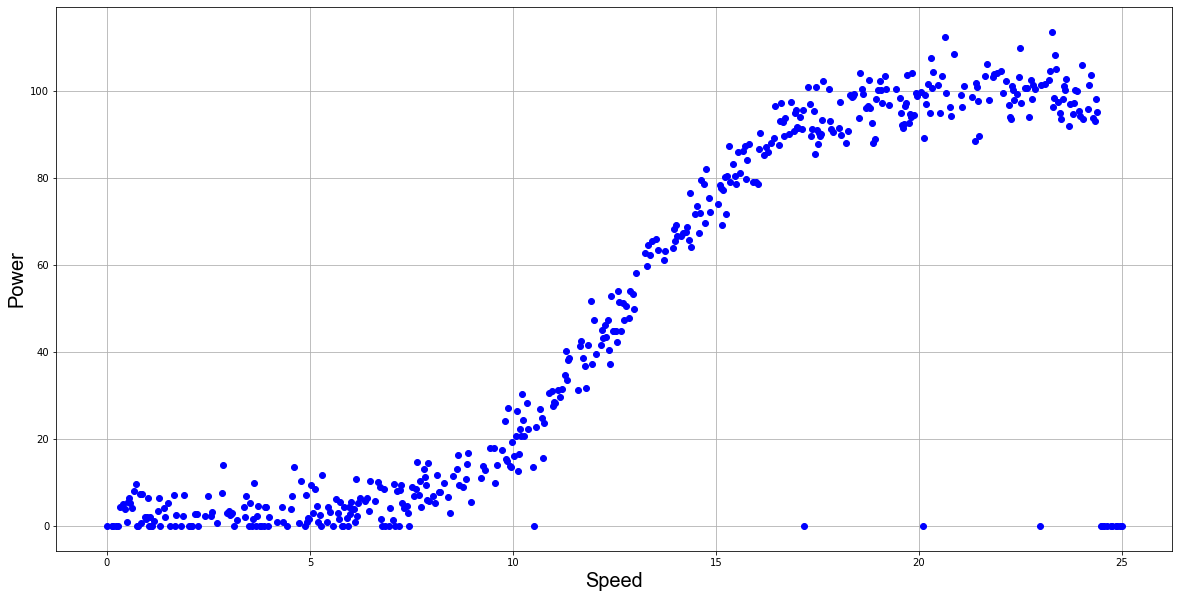

In [183]:
# plot the data
axis_font = {'fontname':'Arial', 'size':'20'}
plt.figure(figsize=(20,10))
plt.plot(powerProductionDataSet['speed'], powerProductionDataSet['power'], 'bo')
plt.grid(True)
plt.xlabel("Speed", **axis_font)
plt.ylabel("Power", **axis_font)